# Data Pre-Processing

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [348]:
df=pd.read_csv("Dataset/Hotel_Reviews.csv")
print(df.head(5))

                                       Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                     

## Data Cleaning

### Removing Unwanted Columns

In [349]:
print(df.columns)

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')


In [350]:
print(df['Hotel_Name'].unique)

<bound method Series.unique of 0                   Hotel Arena
1                   Hotel Arena
2                   Hotel Arena
3                   Hotel Arena
4                   Hotel Arena
                  ...          
515733    Atlantis Hotel Vienna
515734    Atlantis Hotel Vienna
515735    Atlantis Hotel Vienna
515736    Atlantis Hotel Vienna
515737    Atlantis Hotel Vienna
Name: Hotel_Name, Length: 515738, dtype: object>


In [351]:
print(df.Hotel_Name.nunique())
print(df.Hotel_Address.nunique())

1492
1493


In [352]:
df2 = df[['Hotel_Name', 'Hotel_Address']].drop_duplicates().copy()
print("\nunique Hotel_Name and Hotel_Address pair: ", len(df2), "\nunique Hotel_Name: ", len(df2['Hotel_Name'].unique()), "\nunique Hotel_Address: " , len(df2['Hotel_Address'].unique()))

print("\nValue Count of each columns: ")
print(df2['Hotel_Name'].value_counts().head(3))
print(df2['Hotel_Address'].value_counts().head(3))

print("\n3 Differnt Addresses for Hotel Regina: ")
print(df2[df2['Hotel_Name']=='Hotel Regina'])

print("\n2 Hotels with same address: ")
print(df2[df2['Hotel_Address']=='8 Northumberland Avenue Westminster Borough London WC2N 5BY United Kingdom'])


unique Hotel_Name and Hotel_Address pair:  1494 
unique Hotel_Name:  1492 
unique Hotel_Address:  1493

Value Count of each columns: 
Hotel Regina                               3
Banks Mansion All Inclusive Hotel          1
Arion Cityhotel Vienna und Appartements    1
Name: Hotel_Name, dtype: int64
8 Northumberland Avenue Westminster Borough London WC2N 5BY United Kingdom    2
 s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands                     1
Hernalser Hauptstra e 105 17 Hernals 1170 Vienna Austria                      1
Name: Hotel_Address, dtype: int64

3 Differnt Addresses for Hotel Regina: 
          Hotel_Name                                      Hotel_Address
285876  Hotel Regina         Bergara 2 4 Eixample 08002 Barcelona Spain
433920  Hotel Regina  Rooseveltplatz 15 09 Alsergrund 1090 Vienna Au...
472196  Hotel Regina  Via Cesare Correnti 13 Milan City Center 20123...

2 Hotels with same address: 
                                  Hotel_Name  \
247613         The

In [353]:
#Modyfying Names of the Hotel with differnt addresses
df['Hotel_Name'][df['Hotel_Address'].str.startswith("Bergara 2 4 Eixample 08002 Barcelona Spain")] = 'Hotel Regina 1'
df['Hotel_Name'][df['Hotel_Address'].str.startswith("Rooseveltplatz 15 09 Alsergrund 1090 Vienna Au")] = 'Hotel Regina 2'
df['Hotel_Name'][df['Hotel_Address'].str.startswith("Via Cesare Correnti 13 Milan City Center 20123")] = 'Hotel Regina 3'

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\3946017793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hotel_Name'][df['Hotel_Address'].str.startswith("Bergara 2 4 Eixample 08002 Barcelona Spain")] = 'Hotel Regina 1'
C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\3946017793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hotel_Name'][df['Hotel_Address'].str.startswith("Rooseveltplatz 15 09 Alsergrund 1090 Vienna Au")] = 'Hotel Regina 2'
C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\3946017793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [354]:
#drop unwanted columns incl Addresses
df.drop(['lat', 'lng', 'Hotel_Address' ], axis=1, inplace=True)

In [355]:
df.columns

Index(['Additional_Number_of_Scoring', 'Review_Date', 'Average_Score',
       'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review',
       'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews',
       'Positive_Review', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review'],
      dtype='object')

### Null Values

In [356]:
df[df.isnull().any(axis=1)]
# No Null values

,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review


### Duplicate Entries

In [357]:
df.drop_duplicates(inplace=True)

### Noisy Values

In [358]:
'''
Hotel_Address: Address of hotel.
Review_Date: Date when reviewer posted the corresponding review.
Average_Score: Average Score of the hotel, calculated based on the latest comment in the last year.
Hotel_Name: Name of Hotel
Reviewer_Nationality: Nationality of Reviewer
Negative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
ReviewTotalNegativeWordCounts: Total number of words in the negative review.
Positive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
ReviewTotalPositiveWordCounts: Total number of words in the positive review.
Reviewer_Score: Score the reviewer has given to the hotel, based on his/her experience
TotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.
TotalNumberof_Reviews: Total number of valid reviews the hotel has.
Tags: Tags reviewer gave the hotel.
dayssincereview: Duration between the review date and scrape date.
AdditionalNumberof_Scoring: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
lat: Latitude of the hotel
lng: longtitude of the hotel
'''

"\nHotel_Address: Address of hotel.\nReview_Date: Date when reviewer posted the corresponding review.\nAverage_Score: Average Score of the hotel, calculated based on the latest comment in the last year.\nHotel_Name: Name of Hotel\nReviewer_Nationality: Nationality of Reviewer\nNegative_Review: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'\nReviewTotalNegativeWordCounts: Total number of words in the negative review.\nPositive_Review: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'\nReviewTotalPositiveWordCounts: Total number of words in the positive review.\nReviewer_Score: Score the reviewer has given to the hotel, based on his/her experience\nTotalNumberofReviewsReviewerHasGiven: Number of Reviews the reviewers has given in the past.\nTotalNumberof_Reviews: Total number of valid reviews the hotel has.\nTags: Tags revi

<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: Additional_Number_of_Scoring
Non-Null Count   Dtype
--------------   -----
515212 non-null  int64
dtypes: int64(1)
memory usage: 7.9 MB
None
count    515212
mean        498
std         500
min           1
25%         169
50%         342
75%         660
max        2682
Name: Additional_Number_of_Scoring, dtype: int32


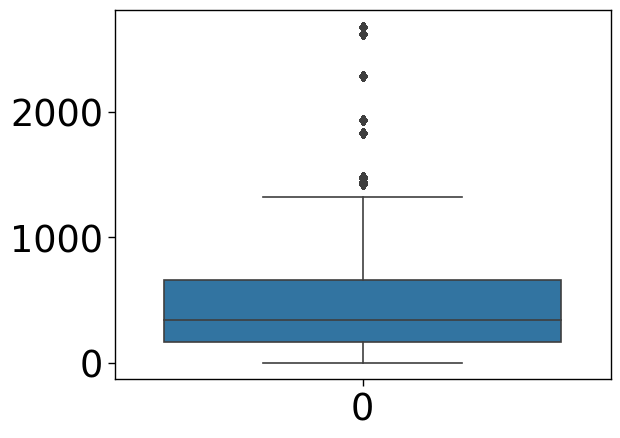

In [359]:
print(df['Additional_Number_of_Scoring'].info())
print(df['Additional_Number_of_Scoring'].describe().astype("int32"))
sns.boxplot(df['Additional_Number_of_Scoring'])
plt.show()
#Right Skewed, No Outlier


In [360]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
print(df['Review_Date'].info())
print(df['Review_Date'].describe())

print(df['Review_Date'].groupby([df['Review_Date'].dt.year, df['Review_Date'].dt.month]).agg('count'))
#All date converted to dt form


<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: Review_Date
Non-Null Count   Dtype         
--------------   -----         
515212 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 24.0 MB
None
count                  515212
unique                    731
top       2017-08-02 00:00:00
freq                     2584
first     2015-08-04 00:00:00
last      2017-08-03 00:00:00
Name: Review_Date, dtype: object
Review_Date  Review_Date
2015         8              19287
             9              19689
             10             19449
             11             18039
             12             17914
2016         1              19496
             2              18836
             3              20722
             4              21471
             5              23055
             6              20920
             7              25865
             8              27252
             9              22652
             10             24324
  

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\1597147516.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df['Review_Date'].describe())


In [361]:
print(df['Average_Score'].info())
print(df['Average_Score'].describe())

#Right Noise, No Outlier

<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: Average_Score
Non-Null Count   Dtype  
--------------   -----  
515212 non-null  float64
dtypes: float64(1)
memory usage: 24.0 MB
None
count    515212.000000
mean          8.397767
std           0.547952
min           5.200000
25%           8.100000
50%           8.400000
75%           8.800000
max           9.800000
Name: Average_Score, dtype: float64


In [362]:
print(df['Hotel_Name'].dtype)
print(df['Hotel_Name'].unique())

#Strings, resolved

object
['Hotel Arena' 'K K Hotel George' 'Apex Temple Court Hotel' ...
 'The Berkeley' 'Holiday Inn London Kensington' 'Atlantis Hotel Vienna']


In [363]:
print("Dtype: ", df['Reviewer_Nationality'].dtype)
print("No of Countries: ", len(df['Reviewer_Nationality'].unique()))
print(np.sort(df['Reviewer_Nationality'].unique()))

# No Noisy values

Dtype:  object
No of Countries:  227
[' ' ' Abkhazia Georgia ' ' Afghanistan ' ' Albania ' ' Algeria '
 ' American Samoa ' ' Andorra ' ' Angola ' ' Anguilla ' ' Antarctica '
 ' Antigua Barbuda ' ' Argentina ' ' Armenia ' ' Aruba ' ' Australia '
 ' Austria ' ' Azerbaijan ' ' Bahamas ' ' Bahrain ' ' Bangladesh '
 ' Barbados ' ' Belarus ' ' Belgium ' ' Belize ' ' Benin ' ' Bermuda '
 ' Bhutan ' ' Bolivia ' ' Bonaire St Eustatius and Saba '
 ' Bosnia and Herzegovina ' ' Botswana ' ' Brazil '
 ' British Virgin Islands ' ' Brunei ' ' Bulgaria ' ' Burundi '
 ' Cambodia ' ' Cameroon ' ' Canada ' ' Cape Verde ' ' Cayman Islands '
 ' Central Africa Republic ' ' Chile ' ' China ' ' Cocos K I '
 ' Colombia ' ' Comoros ' ' Congo ' ' Cook Islands ' ' Costa Rica '
 ' Crimea ' ' Croatia ' ' Cura ao ' ' Cyprus ' ' Czech Republic '
 ' Democratic Republic of the Congo ' ' Denmark ' ' Djibouti '
 ' Dominica ' ' Dominican Republic ' ' East Timor ' ' Ecuador ' ' Egypt '
 ' El Salvador ' ' Equatorial Guinea 

In [364]:
print("Dtype: ", df['Negative_Review'].dtype)
print("Unique entries: ", len(df['Negative_Review'].unique()))

## So many duplicate entries

Dtype:  object
Unique entries:  330011


<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: Review_Total_Negative_Word_Counts
Non-Null Count   Dtype
--------------   -----
515212 non-null  int64
dtypes: int64(1)
memory usage: 24.0 MB
None
count    515212
mean         18
std          29
min           0
25%           2
50%           9
75%          23
max         408
Name: Review_Total_Negative_Word_Counts, dtype: int64
>300 622
>400 6


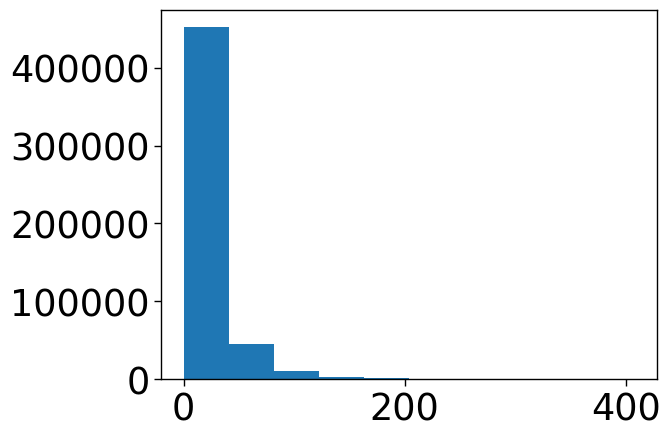

In [365]:
print(df['Review_Total_Negative_Word_Counts'].info())
print(df['Review_Total_Negative_Word_Counts'].describe().astype("int64"))
plt.hist(df['Review_Total_Negative_Word_Counts'])

print(">300", len(df[df['Review_Total_Negative_Word_Counts'] > 300]))
print(">400", len(df[df['Review_Total_Negative_Word_Counts'] > 400]))

## left skewed

In [366]:
print("Dtype: ", df['Positive_Review'].dtype)
print("Unique entries: ", len(df['Positive_Review'].unique()))

## So many duplicate entries

Dtype:  object
Unique entries:  412601


<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: Review_Total_Positive_Word_Counts
Non-Null Count   Dtype
--------------   -----
515212 non-null  int64
dtypes: int64(1)
memory usage: 24.0 MB
None
count    515212
mean         17
std          21
min           0
25%           5
50%          11
75%          22
max         395
Name: Review_Total_Positive_Word_Counts, dtype: int64
>200 637
>300 133


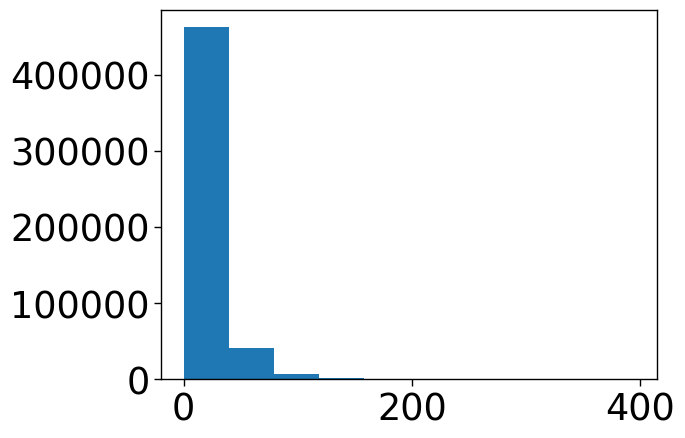

In [367]:
print(df['Review_Total_Positive_Word_Counts'].info())
print(df['Review_Total_Positive_Word_Counts'].describe().astype("int64"))
plt.hist(df['Review_Total_Positive_Word_Counts'])

print(">200", len(df[df['Review_Total_Positive_Word_Counts'] > 200]))
print(">300", len(df[df['Review_Total_Positive_Word_Counts'] > 300]))

## left skewed

<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: Total_Number_of_Reviews
Non-Null Count   Dtype
--------------   -----
515212 non-null  int64
dtypes: int64(1)
memory usage: 24.0 MB
None
count    515212
mean       2744
std        2318
min          43
25%        1161
50%        2134
75%        3633
max       16670
Name: Total_Number_of_Reviews, dtype: int64
>15000 1876


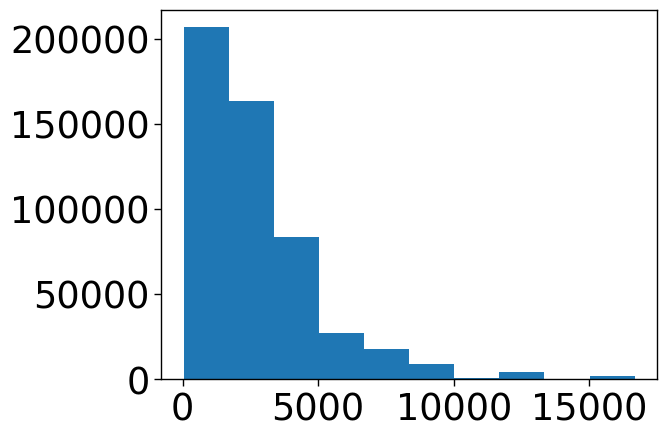

In [368]:
print(df['Total_Number_of_Reviews'].info())
print(df['Total_Number_of_Reviews'].describe().astype("int64"))
plt.hist(df['Total_Number_of_Reviews'])

print(">15000", len(df[df['Total_Number_of_Reviews'] > 15000]))
## left skewed



<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: Review_Total_Positive_Word_Counts
Non-Null Count   Dtype
--------------   -----
515212 non-null  int64
dtypes: int64(1)
memory usage: 24.0 MB
None
count    515212
mean         17
std          21
min           0
25%           5
50%          11
75%          22
max         395
Name: Review_Total_Positive_Word_Counts, dtype: int64
>200 637


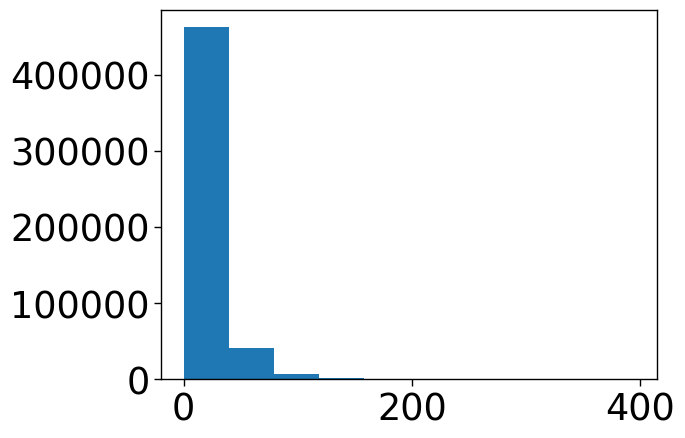

In [369]:
print(df['Review_Total_Positive_Word_Counts'].info())
print(df['Review_Total_Positive_Word_Counts'].describe().astype("int64"))
plt.hist(df['Review_Total_Positive_Word_Counts'])

print(">200", len(df[df['Review_Total_Positive_Word_Counts'] > 200]))
## left skewed




<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: Reviewer_Score
Non-Null Count   Dtype  
--------------   -----  
515212 non-null  float64
dtypes: float64(1)
memory usage: 24.0 MB
None
count    515212
mean          8
std           1
min           2
25%           7
50%           8
75%           9
max          10
Name: Reviewer_Score, dtype: int64


(array([  3820.,   6879.,  11533.,  17926.,  12511.,  34048.,  60078.,
         74696., 106066., 187655.]),
 array([ 2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,  8.5 ,
         9.25, 10.  ]),
 <BarContainer object of 10 artists>)

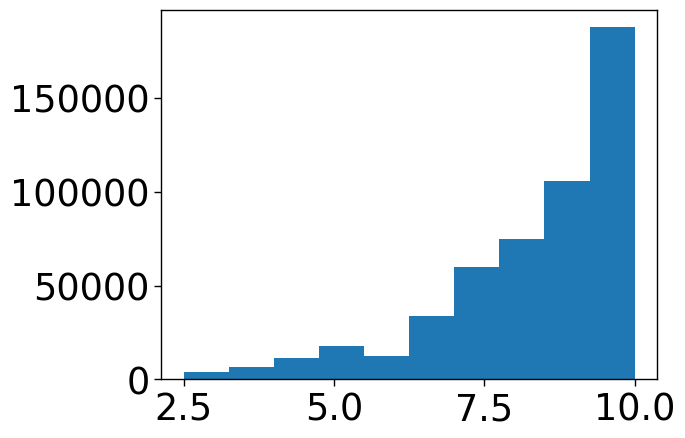

In [370]:
print(df['Reviewer_Score'].info())
print(df['Reviewer_Score'].describe().astype("int64"))
plt.hist(df['Reviewer_Score'])

In [371]:
#Convert all rows of 'days_since_review' to int
df['days_since_review'] = ((pd.to_datetime("8/3/2017") - df['Review_Date']).dt.days)


In [372]:
print("Dtype: ", df['Tags'].dtype)
tagset = set()
for a in df['Tags']:
    a = a[1:-1]
    a = a[1:-1]
    a = a.split("', '")
    for i in a:
        tagset.add(i)
    
print("Total No of Tags: ", len(tagset))


Dtype:  object
Total No of Tags:  2428


In [373]:
print(df['days_since_review'].info())
print(df['days_since_review'].describe().astype("int64"))


<class 'pandas.core.series.Series'>
Int64Index: 515212 entries, 0 to 515737
Series name: days_since_review
Non-Null Count   Dtype
--------------   -----
515212 non-null  int64
dtypes: int64(1)
memory usage: 24.0 MB
None
count    515212
mean        354
std         208
min           0
25%         175
50%         353
75%         527
max         730
Name: days_since_review, dtype: int64


In [374]:
df.to_csv("Dataset\hotel_preprocessed.csv")

In [375]:
dfsmp = df.drop_duplicates(subset = "Positive_Review").copy()
dfsmp = dfsmp.drop_duplicates(subset = "Negative_Review").copy()
dfsmp = dfsmp.drop_duplicates(subset = "Tags").copy()
dfsmp.to_csv("Dataset\hotel_preprocessed_sample.csv")

In [376]:
dfsmp.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,days_since_review
count,37346.000000,37346.000000,37346.000000,37346.000000,37346.000000,37346.000000,37346.000000,37346.000000
mean,413.787554,8.414427,32.881995,2318.623976,23.835806,7.487174,8.164936,323.099877
std,459.503516,0.533988,38.291657,2086.088724,25.856774,11.259949,1.580662,213.123191
min,1.000000,6.400000,0.000000,45.000000,0.000000,1.000000,2.500000,0.000000
25%,122.000000,8.100000,11.000000,917.000000,9.000000,1.000000,7.100000,131.000000
50%,255.000000,8.400000,21.000000,1708.000000,16.000000,4.000000,8.300000,316.000000
75%,522.000000,8.800000,39.000000,3003.000000,29.000000,9.000000,9.600000,485.000000
max,2682.000000,9.600000,399.000000,16670.000000,386.000000,355.000000,10.000000,730.000000


# Visualisation

In [377]:
df=pd.read_csv("Dataset\hotel_preprocessed_sample.csv")

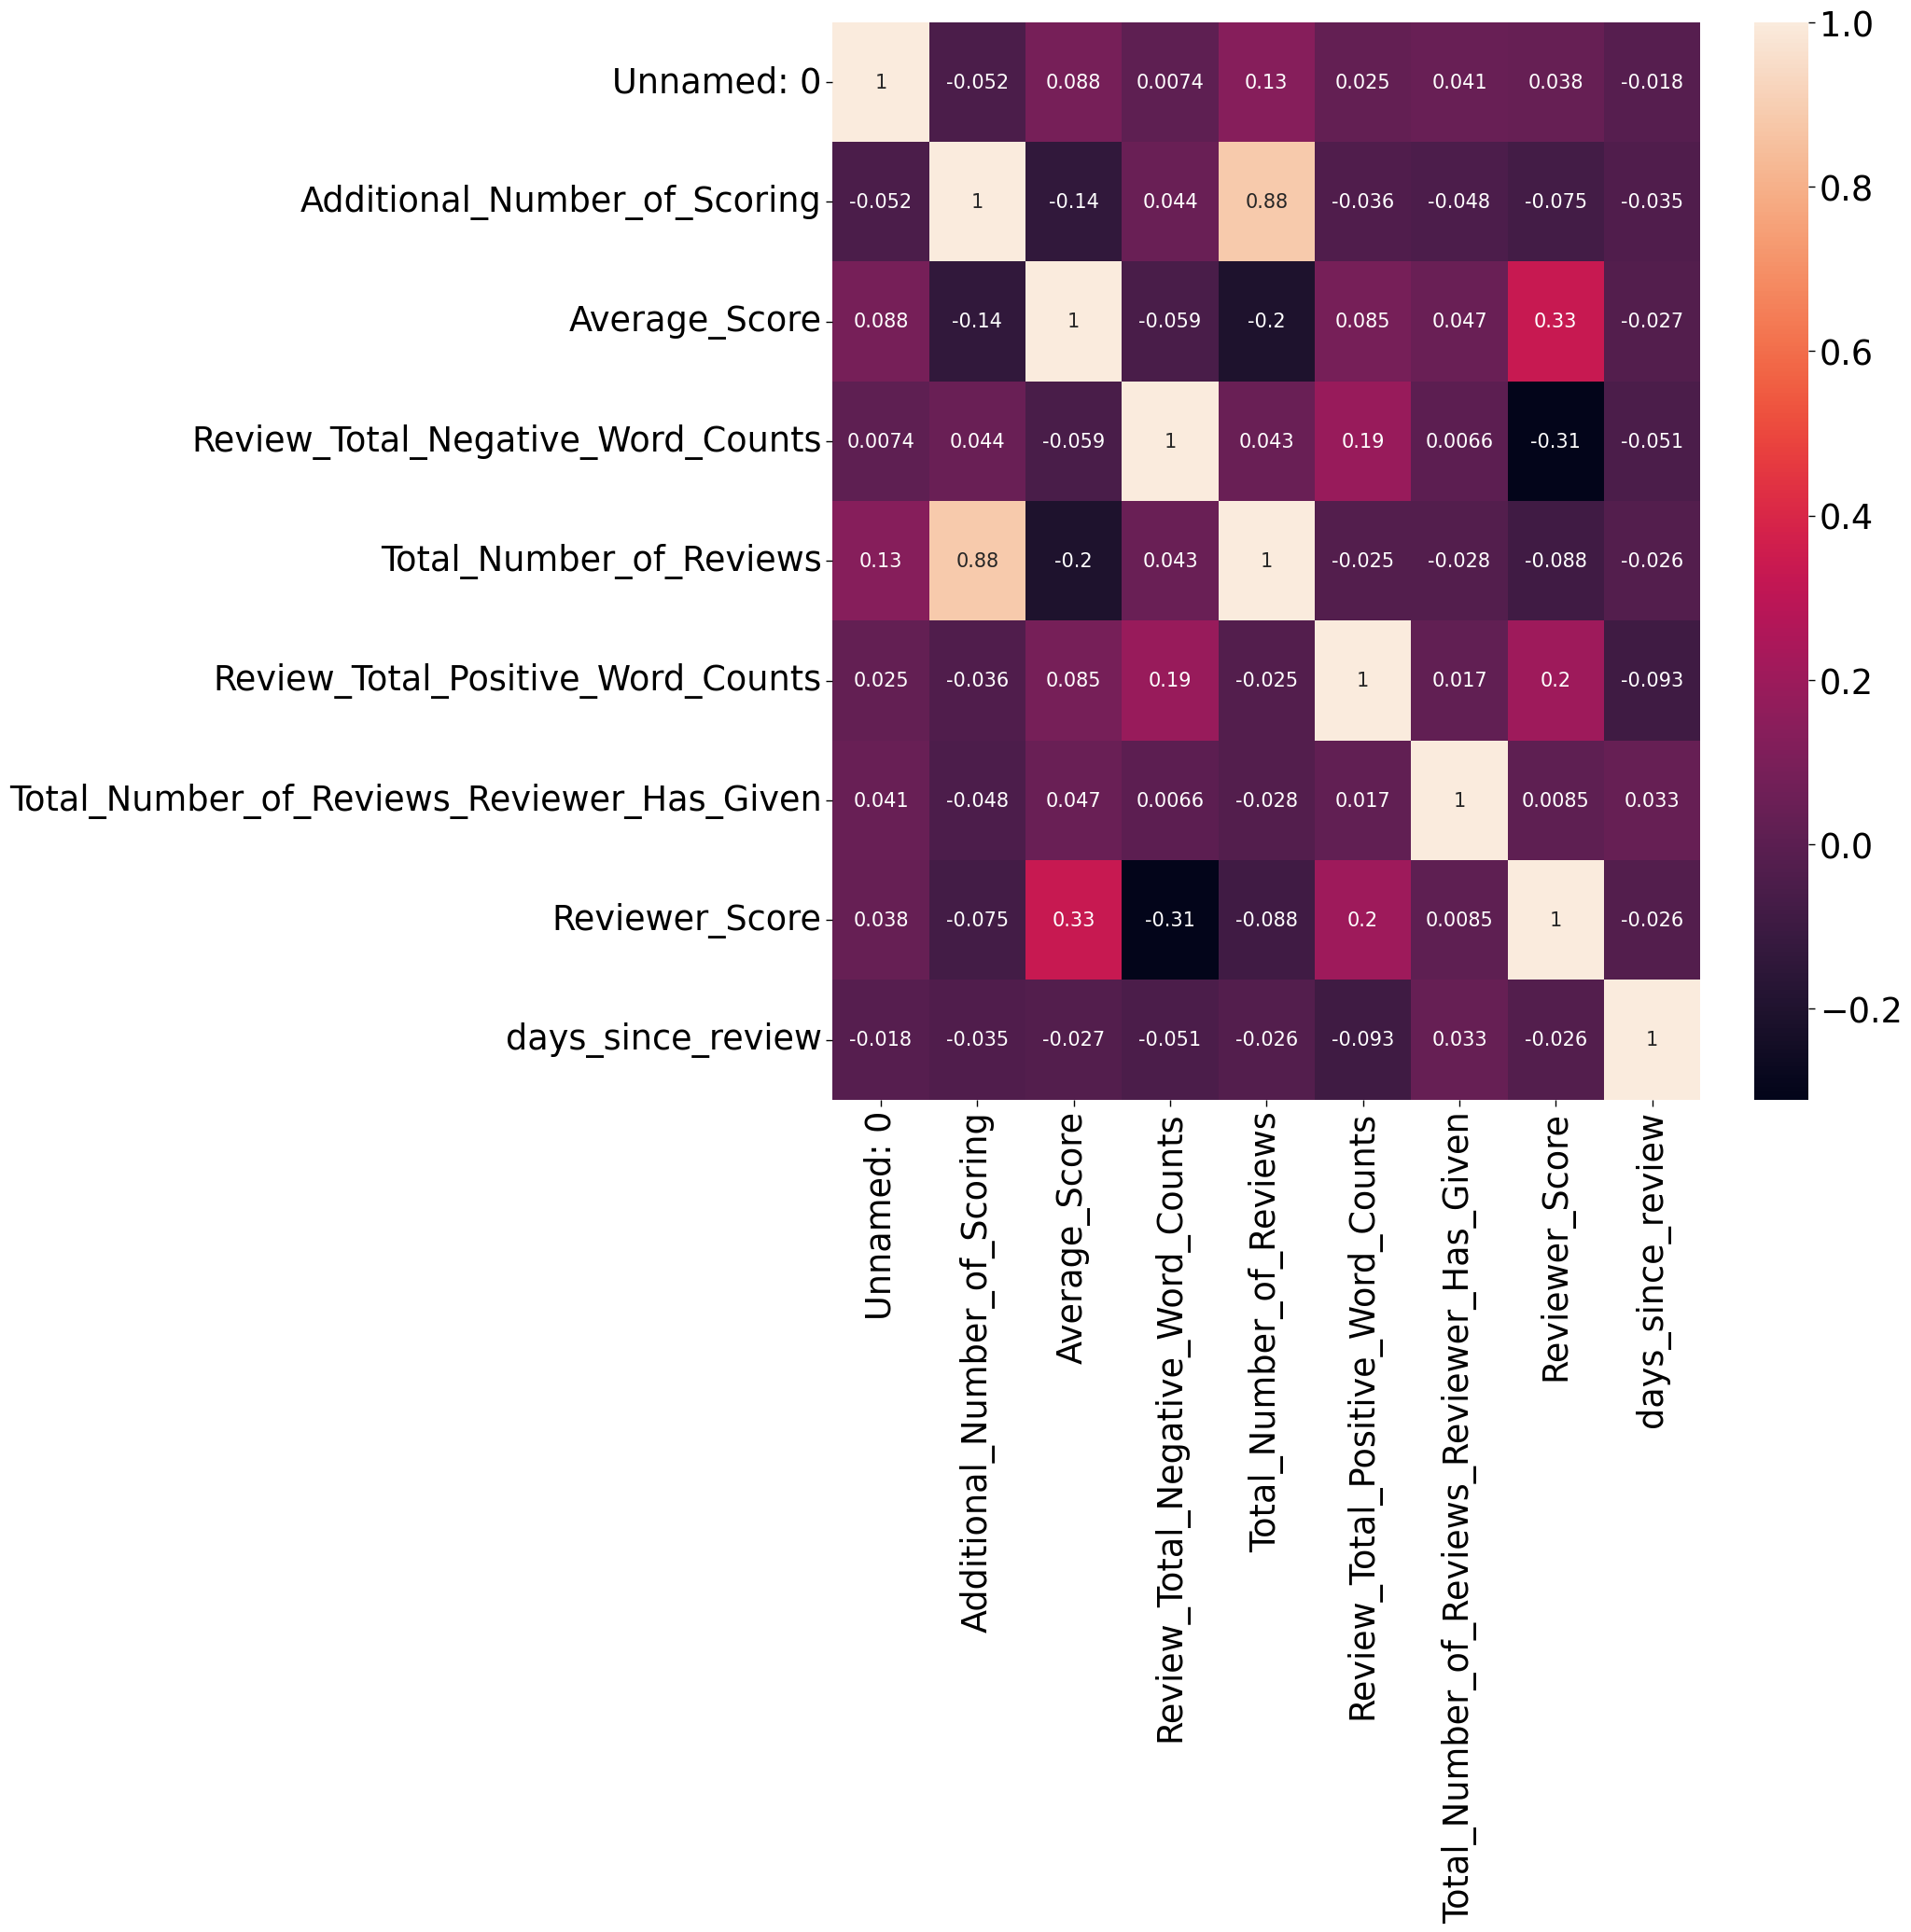

In [378]:
plt.figure(figsize=(15,15))
sns.set_context("paper", font_scale=3,rc={"font.size":15})
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

#No Two columns are correlated, so everything is required for Analysis

we can see that there is some correlation between the "Additional_Number_of_Scoring" and "Total_Number_of_Reviews"

[Text(0.5, 1.0, 'Additional_Number_of_Scoring vs Total_Number_of_Reviews')]

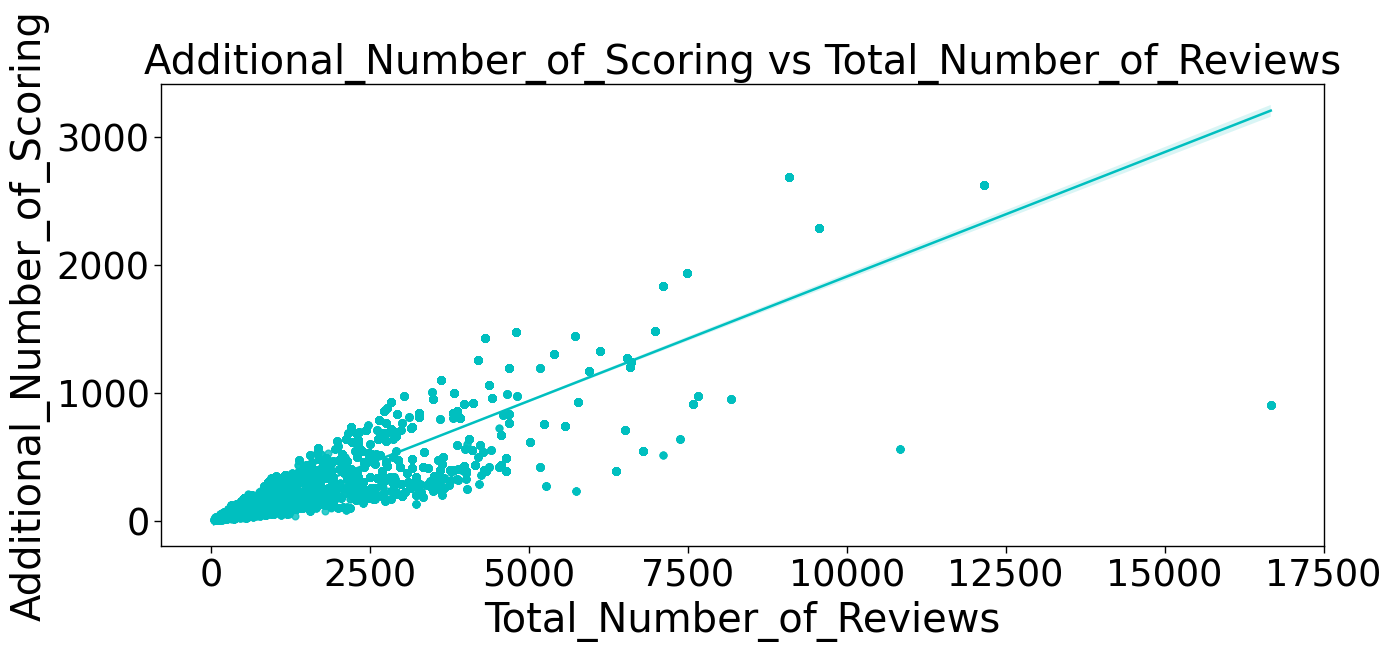

In [379]:
plt.figure(figsize=(15,6))
sns.regplot(data=df,y= "Additional_Number_of_Scoring" , x= "Total_Number_of_Reviews",color="c").set(title="Additional_Number_of_Scoring vs Total_Number_of_Reviews")

Text(0.5, 1.0, 'Distribution of Hotel Average Ratings')

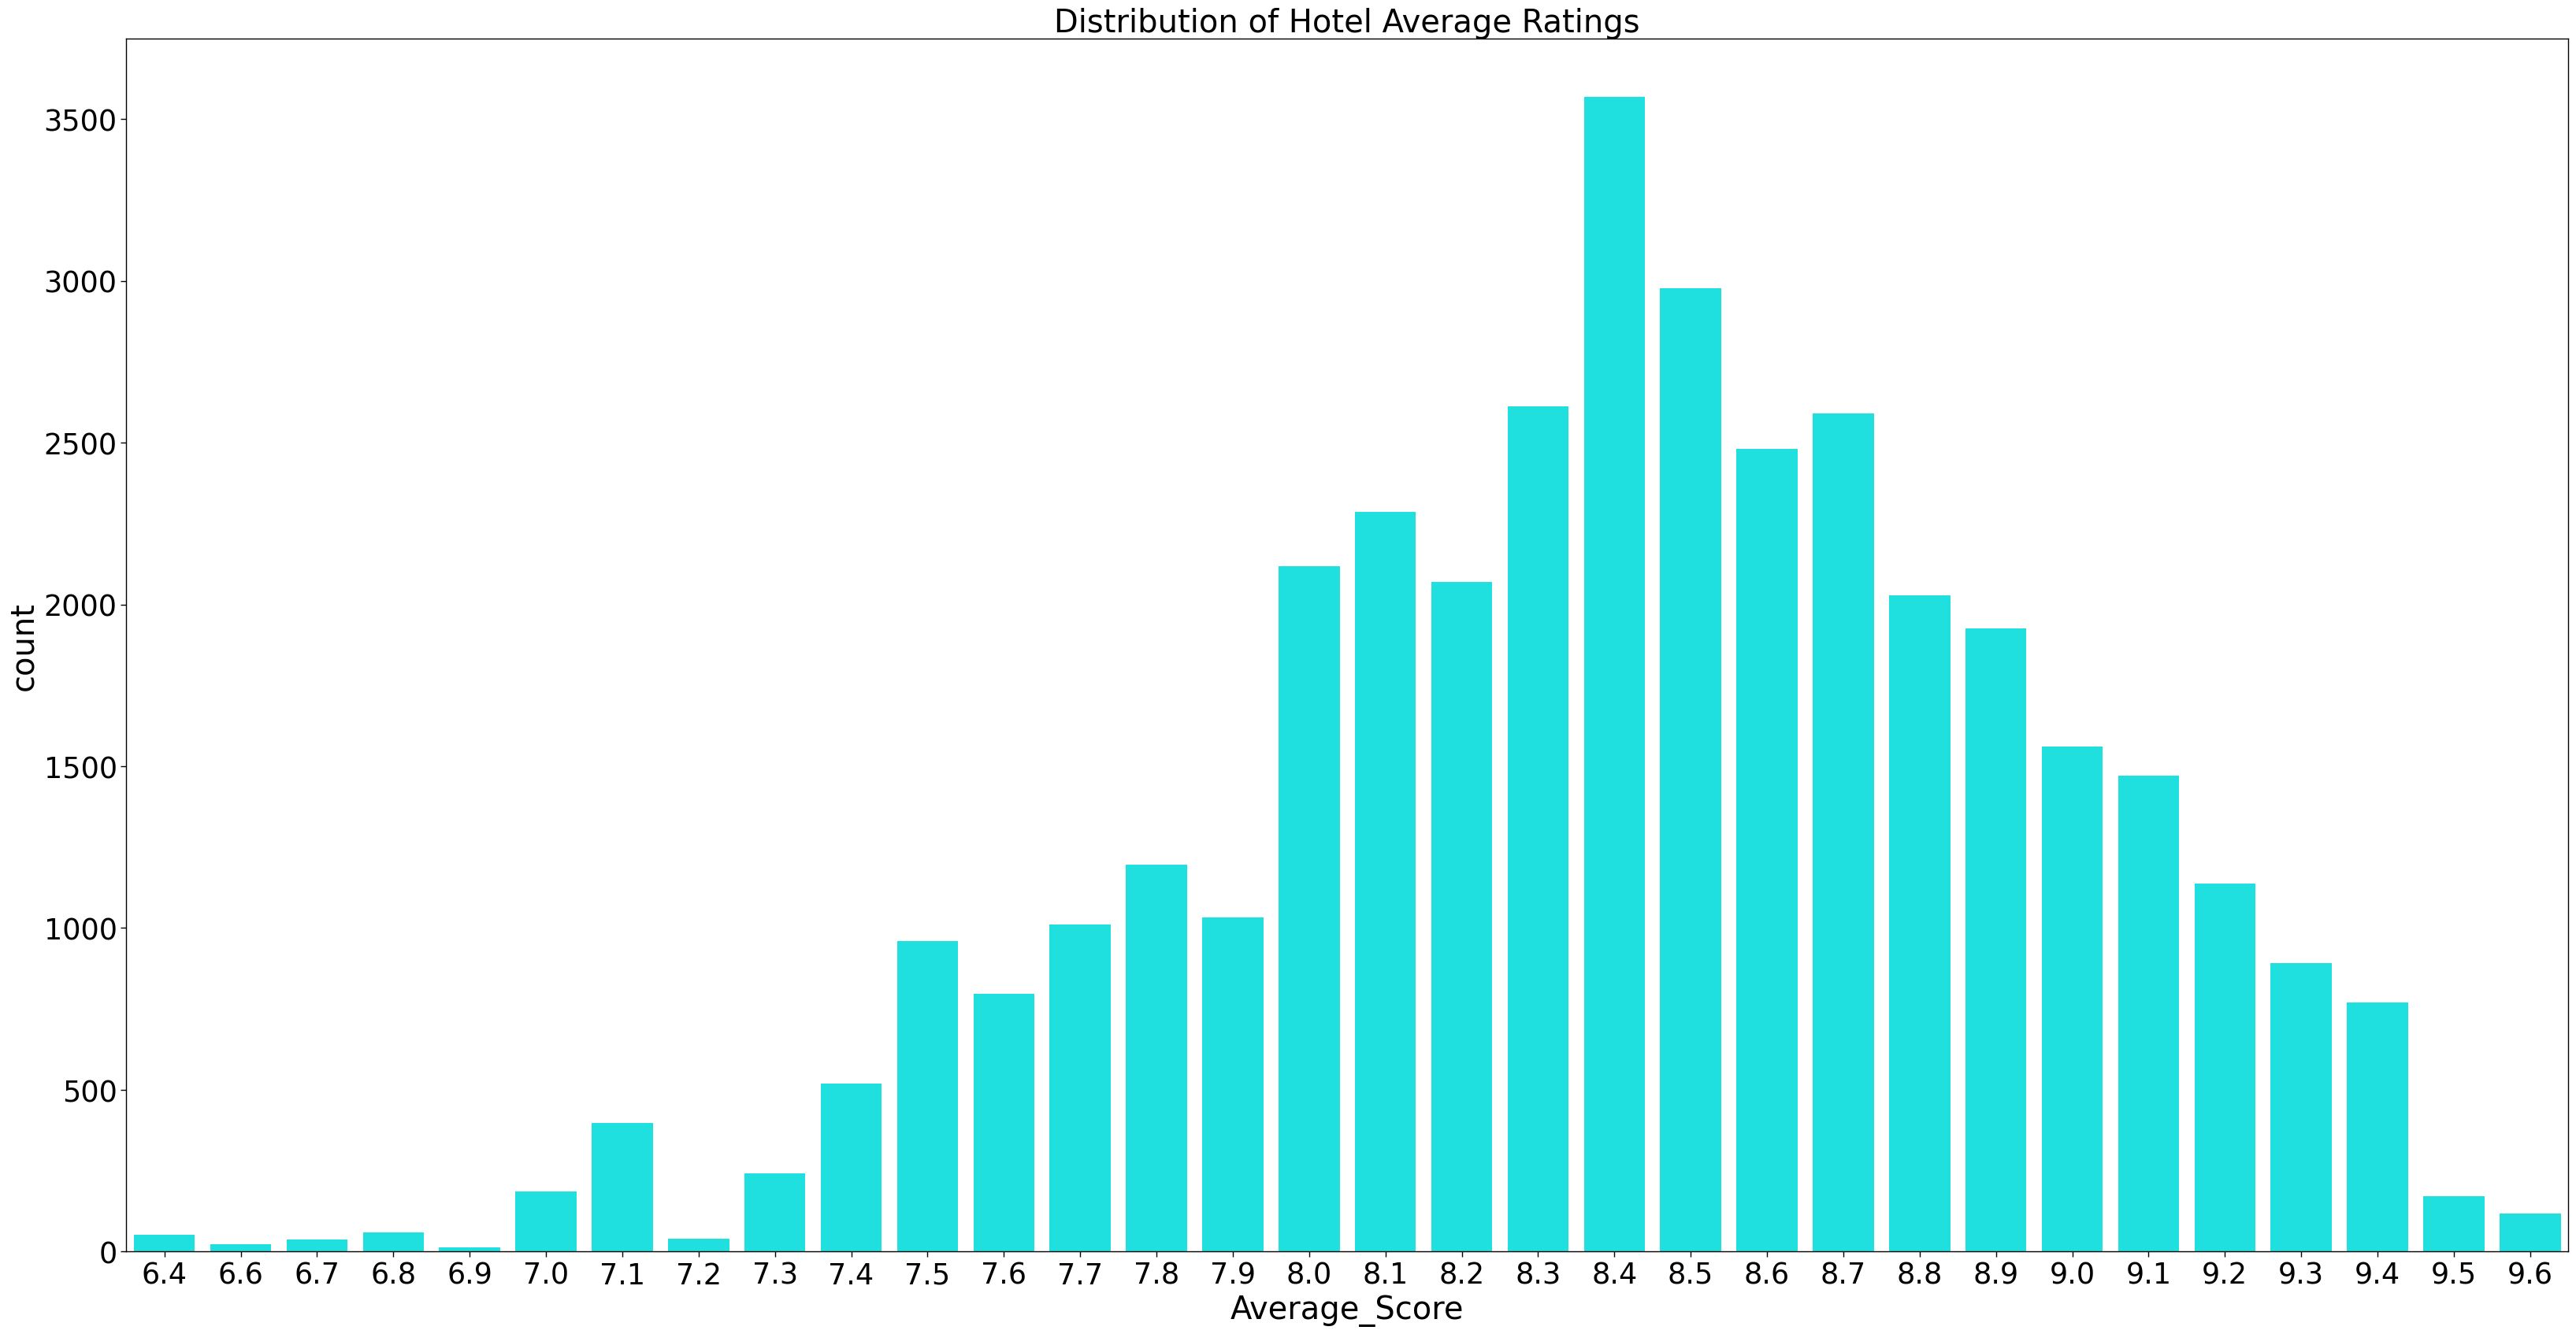

In [380]:
plt.figure(figsize = (40,20))
sns.countplot(x = 'Average_Score',data = df,color = 'cyan')
plt.title("Distribution of Hotel Average Ratings")

(array([ 242.,  458.,  876., 1448., 1075., 3117., 5222., 6536., 8709.,
        9663.]),
 array([ 2.5 ,  3.25,  4.  ,  4.75,  5.5 ,  6.25,  7.  ,  7.75,  8.5 ,
         9.25, 10.  ]),
 <BarContainer object of 10 artists>)

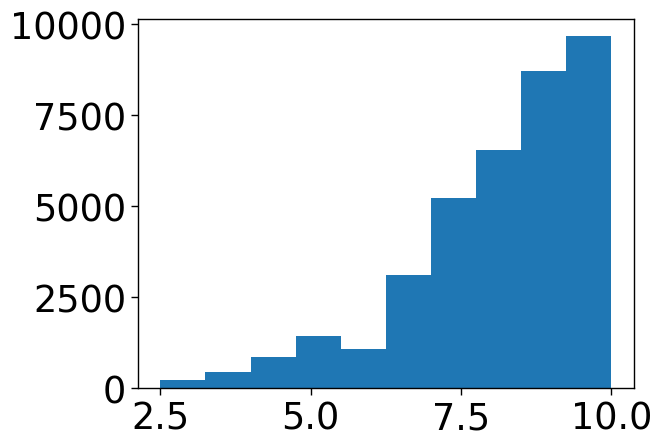

In [381]:
plt.hist(df['Reviewer_Score'])

In [382]:
reviews_df = pd.DataFrame()
reviews_df["review"] = df["Negative_Review"] + df["Positive_Review"]
reviews_df["is_bad_review"] = df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
#reviews_df.insert(1, "Rating", extracted_col)
#extracted_col=df["Reviewer_Score"]
reviews_df['is_bad_review'] = reviews_df['is_bad_review'].replace([1], 'positive')
reviews_df['is_bad_review'] = reviews_df['is_bad_review'].replace([0], 'negative')
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,positive
1,No Negative No real complaints the hotel was g...,negative
2,Rooms are nice but for elderly a bit difficul...,negative
3,My room was dirty and I was afraid to walk ba...,positive
4,You When I booked with your company on line y...,negative


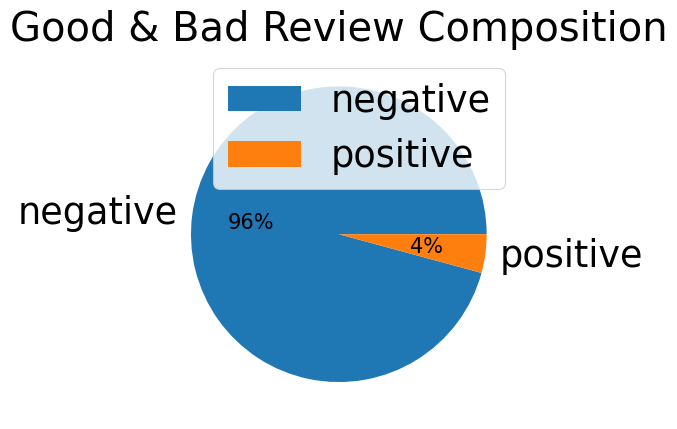

In [383]:
reviews_df.groupby('is_bad_review').size().plot(kind='pie',y="",autopct='%1.0f%%', title="Good & Bad Review Composition")
plt.legend()

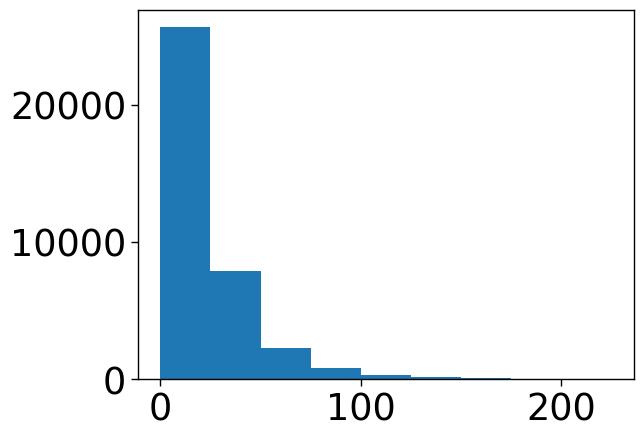

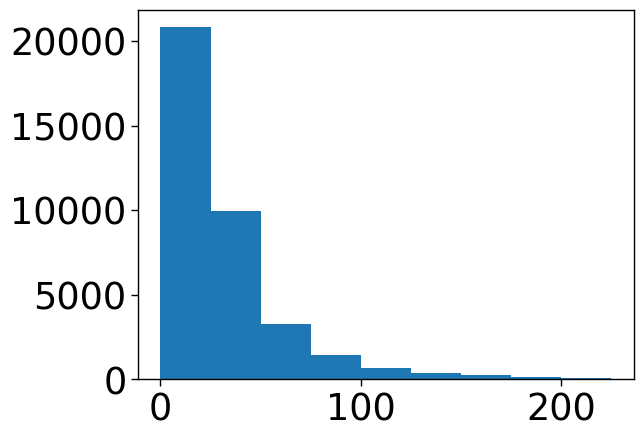

In [384]:
plt.hist(df["Review_Total_Positive_Word_Counts"], bins=np.arange(0,250,25))
plt.show()
plt.hist(df["Review_Total_Negative_Word_Counts"], bins=np.arange(0,250,25))
plt.show()

In [385]:
p=df.groupby("Reviewer_Nationality")["Total_Number_of_Reviews_Reviewer_Has_Given"].sum().reset_index()
p=p.sort_values(by="Total_Number_of_Reviews_Reviewer_Has_Given" , ascending=False)
print(p.head(5))

           Reviewer_Nationality  Total_Number_of_Reviews_Reviewer_Has_Given
166             United Kingdom                                        70346
168   United States of America                                        19632
11                   Australia                                        14916
135               Saudi Arabia                                        10433
153                Switzerland                                         9596


In [386]:
print("Max no of reviews for a hotel", df['Total_Number_of_Reviews'].max())
df[df['Total_Number_of_Reviews'] == df['Total_Number_of_Reviews'].max()].head()

Max no of reviews for a hotel 16670


,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
35940,488439,904,2017-07-21,8.1,Hotel Da Vinci,Spain,The bad thing is that you arrive to the mane ...,80,16670,The parking is big and secure If you need to ...,24,16,5.8,"[' With a pet ', ' Family with young children ...",13
35941,488561,904,2017-05-29,8.1,Hotel Da Vinci,United Kingdom,No iron in rooms poor lighting no aircon duri...,31,16670,Free Breakfast staff very friendly Very big r...,12,1,8.3,"[' Group ', ' Double Room ', ' Stayed 6 nights...",66
35942,488565,904,2017-05-27,8.1,Hotel Da Vinci,United States of America,The hotel is in a residential area with no co...,63,16670,The rooms were nice with good beds and bath but,12,4,6.0,"[' Leisure trip ', ' Couple ', ' Superior Twin...",68
35943,488578,904,2017-05-15,8.1,Hotel Da Vinci,Germany,The day we checked in the receptionist Gloria...,95,16670,Although there is a free parking area at the ...,77,5,6.7,"[' Leisure trip ', ' Family with young childre...",80
35944,488591,904,2017-05-05,8.1,Hotel Da Vinci,Australia,The shower areas need updating but the rest o...,26,16670,This hotel is excellent value for money Free ...,83,8,9.6,"[' Leisure trip ', ' Family with young childre...",90


In [387]:
reviews_df['Length'] = reviews_df['review'].str.len()
reviews_df.head(10)

,review,is_bad_review,Length
0,I am so angry that i made this post available...,positive,1913
1,No Negative No real complaints the hotel was g...,negative,622
2,Rooms are nice but for elderly a bit difficul...,negative,301
3,My room was dirty and I was afraid to walk ba...,positive,1221
4,You When I booked with your company on line y...,negative,774
5,Backyard of the hotel is total mess shouldn t...,negative,186
6,Cleaner did not change our sheet and duvet ev...,positive,235
7,Apart from the price for the brekfast Everyth...,negative,157
8,Even though the pictures show very clean room...,negative,173
9,The aircondition makes so much noise and its ...,negative,312


In [388]:
word_count = reviews_df['review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 404


In [389]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [390]:
reviews_df['Word_count'] = reviews_df['review'].apply(word_count)
reviews_df.head(10)

,review,is_bad_review,Length,Word_count
0,I am so angry that i made this post available...,positive,1913,404
1,No Negative No real complaints the hotel was g...,negative,622,105
2,Rooms are nice but for elderly a bit difficul...,negative,301,59
3,My room was dirty and I was afraid to walk ba...,positive,1221,232
4,You When I booked with your company on line y...,negative,774,144
5,Backyard of the hotel is total mess shouldn t...,negative,186,33
6,Cleaner did not change our sheet and duvet ev...,positive,235,47
7,Apart from the price for the brekfast Everyth...,negative,157,27
8,Even though the pictures show very clean room...,negative,173,34
9,The aircondition makes so much noise and its ...,negative,312,61


In [391]:
reviews_df['mean_word_length'] = reviews_df['review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
reviews_df.head(10)

,review,is_bad_review,Length,Word_count,mean_word_length
0,I am so angry that i made this post available...,positive,1913,404,3.730198
1,No Negative No real complaints the hotel was g...,negative,622,105,4.923810
2,Rooms are nice but for elderly a bit difficul...,negative,301,59,4.067797
3,My room was dirty and I was afraid to walk ba...,positive,1221,232,4.254310
4,You When I booked with your company on line y...,negative,774,144,4.361111
5,Backyard of the hotel is total mess shouldn t...,negative,186,33,4.575758
6,Cleaner did not change our sheet and duvet ev...,positive,235,47,3.957447
7,Apart from the price for the brekfast Everyth...,negative,157,27,4.777778
8,Even though the pictures show very clean room...,negative,173,34,4.088235
9,The aircondition makes so much noise and its ...,negative,312,61,4.081967


In [392]:
from nltk import tokenize
np.mean([len(sent) for sent in tokenize.sent_tokenize(reviews_df['review'][0])])

1912.0

In [393]:
reviews_df['mean_sent_length'] = reviews_df['review'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
reviews_df.head(10)

,review,is_bad_review,Length,Word_count,mean_word_length,mean_sent_length
0,I am so angry that i made this post available...,positive,1913,404,3.730198,1912.0
1,No Negative No real complaints the hotel was g...,negative,622,105,4.923810,621.0
2,Rooms are nice but for elderly a bit difficul...,negative,301,59,4.067797,300.0
3,My room was dirty and I was afraid to walk ba...,positive,1221,232,4.254310,1220.0
4,You When I booked with your company on line y...,negative,774,144,4.361111,773.0
5,Backyard of the hotel is total mess shouldn t...,negative,186,33,4.575758,185.0
6,Cleaner did not change our sheet and duvet ev...,positive,235,47,3.957447,234.0
7,Apart from the price for the brekfast Everyth...,negative,157,27,4.777778,156.0
8,Even though the pictures show very clean room...,negative,173,34,4.088235,173.0
9,The aircondition makes so much noise and its ...,negative,312,61,4.081967,311.0


In [394]:
def visualize(col):
    
    print()
    plt.subplot(1,2,1)
    sns.boxplot(y=reviews_df[col], hue=reviews_df['is_bad_review'])
    plt.ylabel(col, labelpad=25)
    
    plt.subplot(1,2,2)
    sns.kdeplot(y=reviews_df[col],hue=reviews_df['is_bad_review'])
    plt.legend(reviews_df['is_bad_review'].unique())
    plt.xlabel('')
    plt.ylabel('')
    
    plt.show()

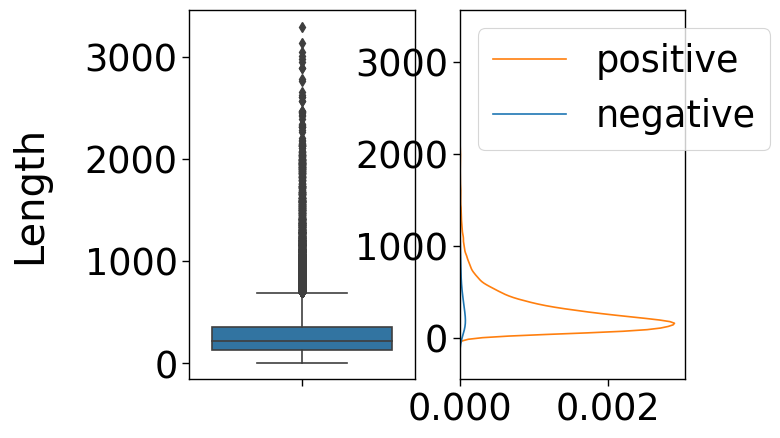

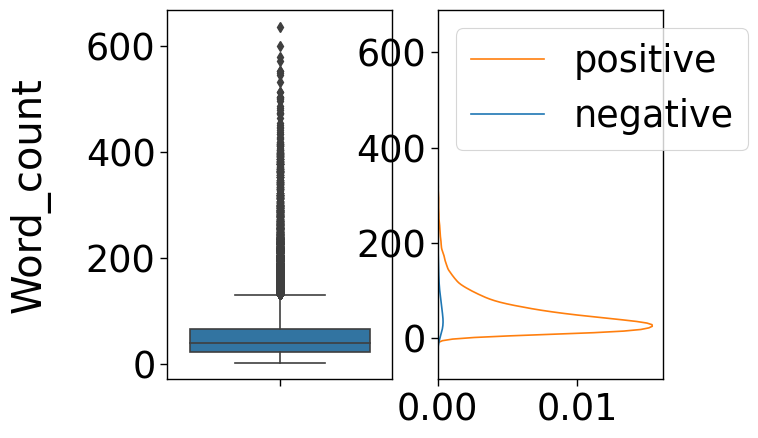

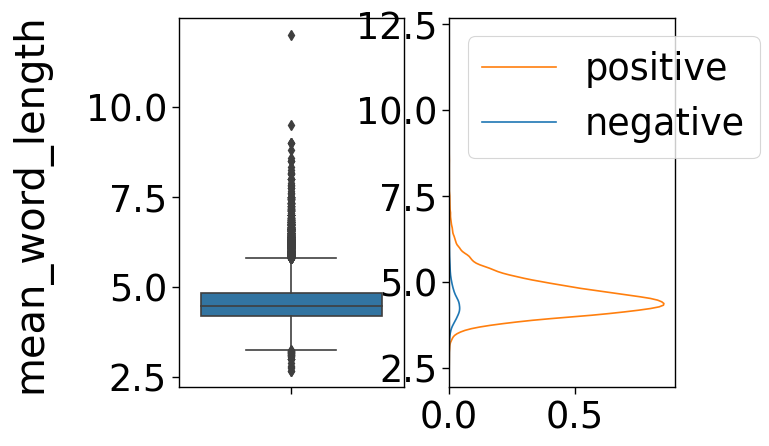

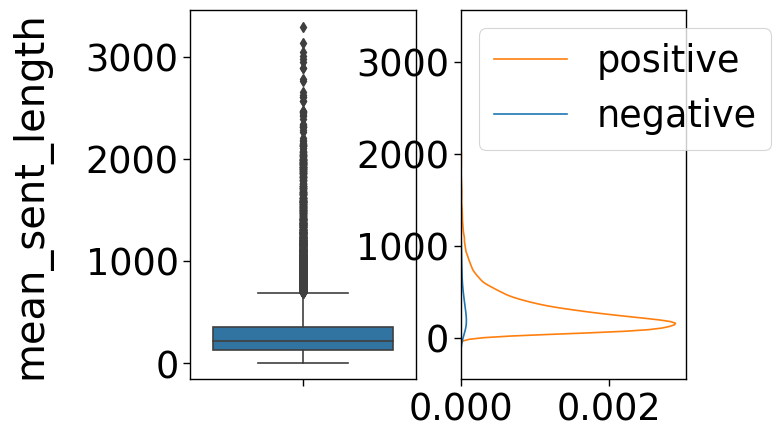

In [395]:
features = reviews_df.columns.tolist()[2:]
for feature in features:
    visualize( feature)

In [396]:
df33 = reviews_df.drop(features, axis=1)
df33.head()

,review,is_bad_review
0,I am so angry that i made this post available...,positive
1,No Negative No real complaints the hotel was g...,negative
2,Rooms are nice but for elderly a bit difficul...,negative
3,My room was dirty and I was afraid to walk ba...,positive
4,You When I booked with your company on line y...,negative


In [397]:
df33.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37346 entries, 0 to 37345
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         37346 non-null  object
 1   is_bad_review  37346 non-null  object
dtypes: object(2)
memory usage: 583.7+ KB


### Using ntlk

In [398]:
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

In [403]:
df['review'] = df33['review'].apply(clean)
df.head(10)

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review
0,0,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,angry made post available via possible sites u...
1,1,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,negative real complaints hotel great great loc...
2,2,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,rooms nice elderly bit difficult rooms two sto...
3,3,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,room dirty afraid walk barefoot floor looked c...
4,4,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,booked company line showed pictures room thoug...
5,5,194,2017-07-24,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10,backyard hotel total mess happen hotel 4 stars...
6,6,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17,cleaner change sheet duvet everyday made bed a...
7,7,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17,apart price brekfast everything good good loca...
8,8,194,2017-07-09,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25,even though pictures show clean rooms actual r...
9,9,194,2017-07-08,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26,aircondition makes much noise hard sleep night...


In [400]:
def corpus(text):
    text_list = text.split()
    return text_list

In [404]:
df['Review_lists'] = df33['review'].apply(corpus)
df.head(10)

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Review_lists
0,0,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,angry made post available via possible sites u...,"[I, am, so, angry, that, i, made, this, post, ..."
1,1,194,2017-08-03,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,negative real complaints hotel great great loc...,"[No, Negative, No, real, complaints, the, hote..."
2,2,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,rooms nice elderly bit difficult rooms two sto...,"[Rooms, are, nice, but, for, elderly, a, bit, ..."
3,3,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,room dirty afraid walk barefoot floor looked c...,"[My, room, was, dirty, and, I, was, afraid, to..."
4,4,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,booked company line showed pictures room thoug...,"[You, When, I, booked, with, your, company, on..."
5,5,194,2017-07-24,7.7,Hotel Arena,Poland,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,6.7,"[' Leisure trip ', ' Group ', ' Duplex Double ...",10,backyard hotel total mess happen hotel 4 stars...,"[Backyard, of, the, hotel, is, total, mess, sh..."
6,6,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17,cleaner change sheet duvet everyday made bed a...,"[Cleaner, did, not, change, our, sheet, and, d..."
7,7,194,2017-07-17,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17,apart price brekfast everything good good loca...,"[Apart, from, the, price, for, the, brekfast, ..."
8,8,194,2017-07-09,7.7,Hotel Arena,Belgium,Even though the pictures show very clean room...,34,1403,No Positive,0,3,6.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",25,even though pictures show clean rooms actual r...,"[Even, though, the, pictures, show, very, clea..."
9,9,194,2017-07-08,7.7,Hotel Arena,Norway,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,7.9,"[' Leisure trip ', ' Couple ', ' Large King Ro...",26,aircondition makes much noise hard sleep night...,"[The, aircondition, makes, so, much, noise, an..."


In [ ]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 37346/37346 [00:00<00:00, 87889.57it/s]


1993623

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('the', 94438),
 ('and', 69012),
 ('was', 51683),
 ('to', 49007),
 ('a', 43989),
 ('in', 32591),
 ('The', 30857),
 ('room', 30517),
 ('of', 27448),
 ('for', 23608)]

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

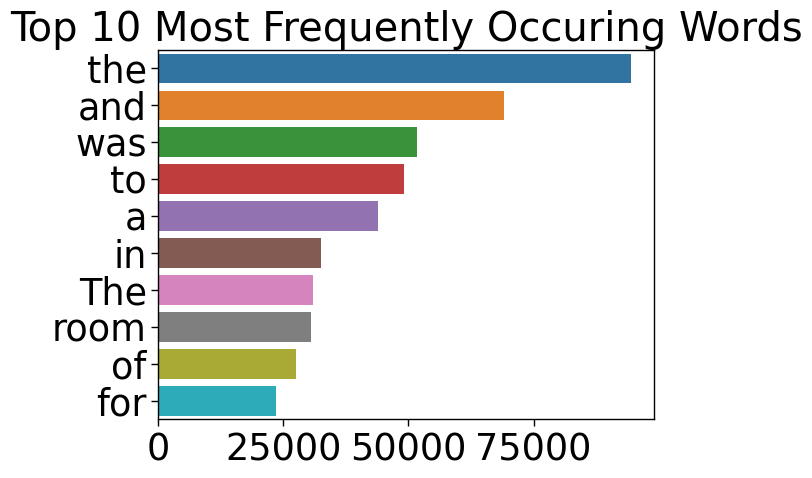

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

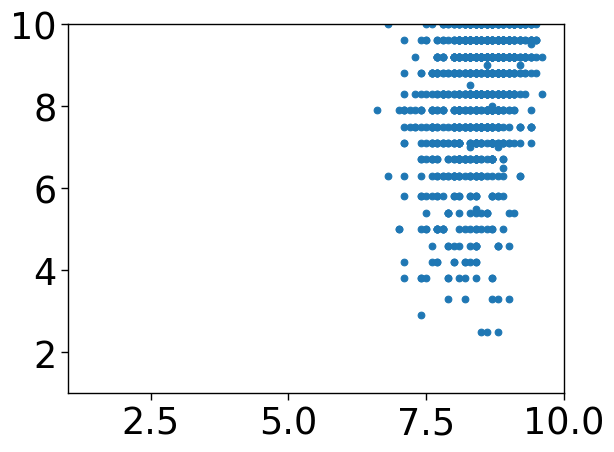

In [405]:
df2 = df.sample(1000)
plt.scatter (df2['Average_Score'], df2['Reviewer_Score'])
plt.xlim([1, 10])
plt.ylim([1, 10])
plt.show()

### using nltk

In [ ]:
import nltk 
from nltk import FreqDist
import re 
import spacy 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
def remove_stopwords(sent: list) -> str:
    sent_new = " ".join([w for w in sent if w.lower() not in stop_words])
    return sent_new
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [ ]:
def plot_word_freq(corpus, n_words = 20):
    """
    a function to plot the most frequently occurring words in a corpus
    """
    all_words = ' '.join([text for text in corpus])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # plot frequency of top n most frequent words
    d = words_df.nlargest(columns="count", n = n_words) 
    plt.figure(figsize=(45,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

In [ ]:
neg = pd.Series([x for x in df.Negative_Review if x!="No Negative"])
pos = pd.Series([x for x in df.Positive_Review if x!="No Positive"])
neg = neg.str.replace("[^a-zA-Z#]", " ")
pos = pos.str.replace("[^a-zA-Z#]", " ")
neg_2 = [remove_stopwords(r.split()) for r in neg]
pos_2 = [remove_stopwords(r.split()) for r in pos]

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\1469984012.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  neg = neg.str.replace("[^a-zA-Z#]", " ")
C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\1469984012.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  pos = pos.str.replace("[^a-zA-Z#]", " ")


Positve Reviews


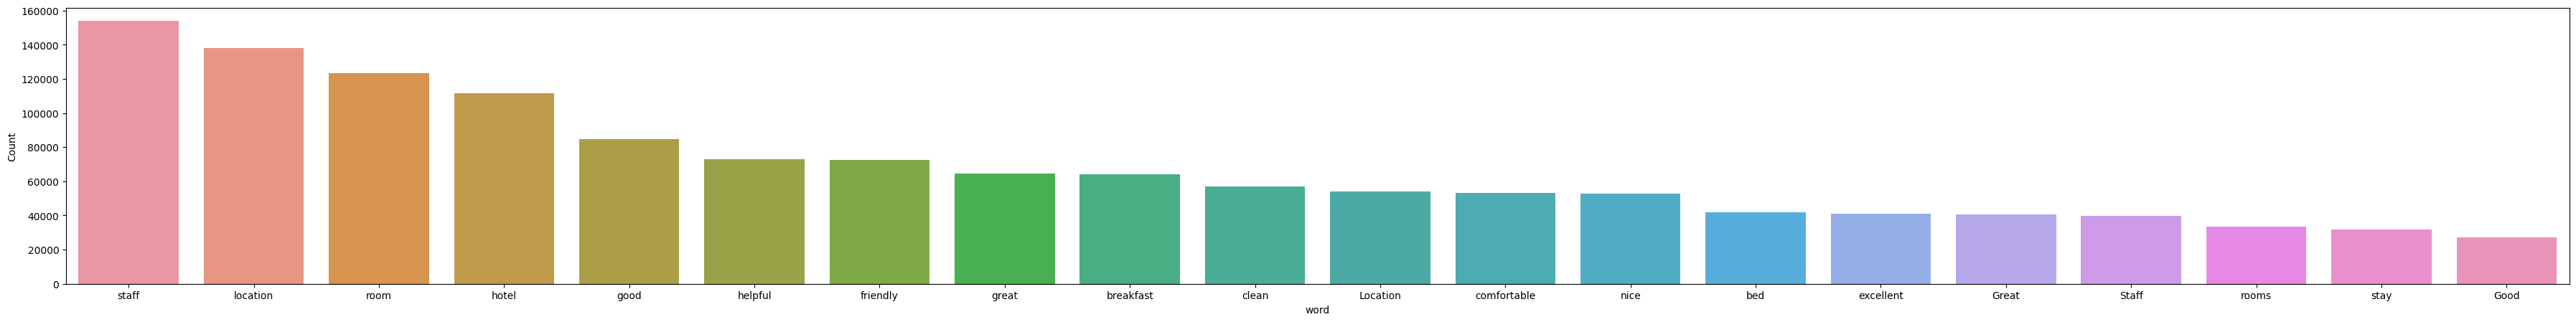

In [ ]:
print("Positve Reviews")
plot_word_freq(pos_2)

Negative Reviews


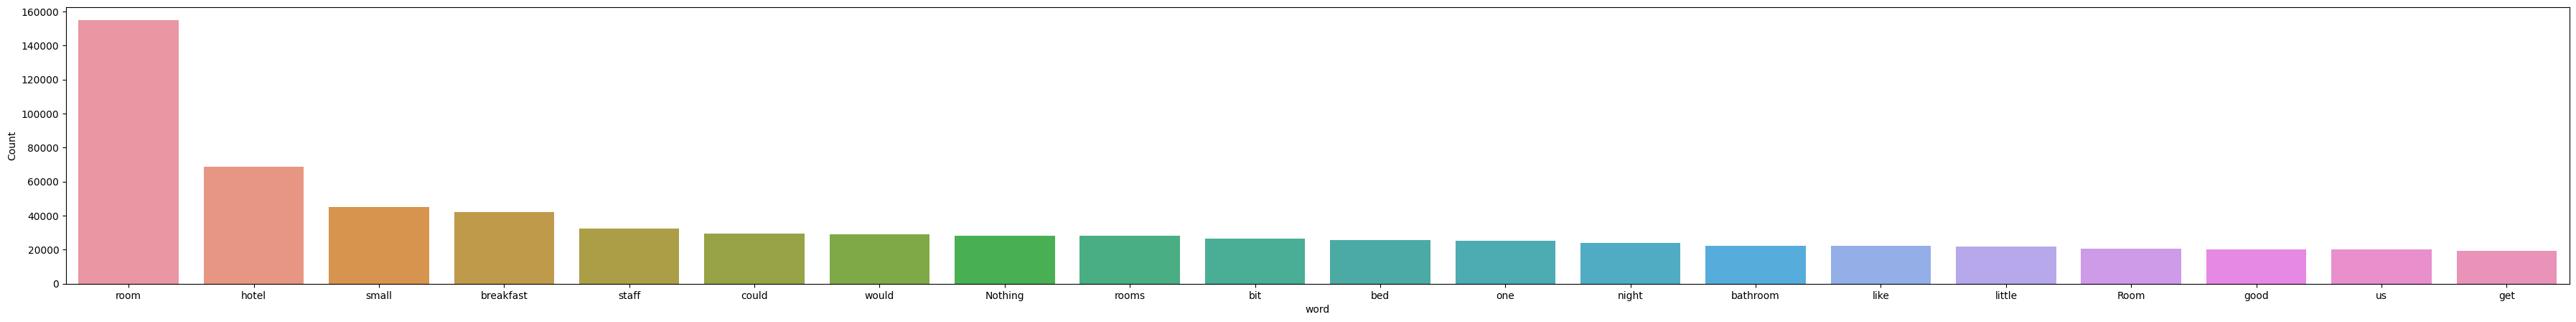

In [ ]:
print("Negative Reviews")
plot_word_freq(neg_2)

# Machine Learning

In [406]:
df = pd.read_csv("Dataset\hotel_preprocessed_sample.csv")

In [407]:
df["Negative_Review"] = df["Negative_Review"].apply(lambda x: str(x).replace("No Negative", " _ "))
df["Positive_Review"] = df["Positive_Review"].apply(lambda x: str(x).replace("No Positive", " _ "))
df["review"] = df["Negative_Review"] + " " + df["Positive_Review"]

In [408]:
neg_percent=df['Review_Total_Negative_Word_Counts']/df["review"].apply(lambda n: len(n.split()))*100
pos_percent=df['Review_Total_Positive_Word_Counts']/df["review"].apply(lambda n: len(n.split()))*100
df['Ratio_count']=pos_percent/neg_percent
#df['Ratio_count']=df['Review_Total_Negative_Word_Counts']/df['Review_Total_Positive_Word_Counts']
df.head()

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Ratio_count
0,0,194,2017-08-03,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,I am so angry that i made this post available...,0.027708
1,1,194,2017-08-03,7.7,Hotel Arena,Ireland,_,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,_ No real complaints the hotel was great gr...,inf
2,2,194,2017-07-31,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3,Rooms are nice but for elderly a bit difficul...,0.500000
3,3,194,2017-07-31,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3,My room was dirty and I was afraid to walk ba...,0.123810
4,4,194,2017-07-24,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10,You When I booked with your company on line y...,0.057143


In [409]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [410]:
df["is_bad_review"] = df['Reviewer_Score'].apply(lambda x: 1 if x < 5 else 0)

In [411]:
grp=df.groupby("is_bad_review")
grp.count()

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Ratio_count
is_bad_review,,,,,,,,,,,,,,,,,
0,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769,35769
1,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576,1576


In [412]:
df1=df[df["is_bad_review"]==1]
df2=df[df["is_bad_review"]==0]

In [413]:
df2=df2.sample(n=1500,replace=False)
df1=df1.sample(n=1500,replace=False)
df1=df1.append(df2)

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\3232403152.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df2)


In [414]:
df1.shape[0]

3000

In [415]:
df=df1
df = df.sample(frac = 1)
df.head(10)

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Ratio_count,is_bad_review
7807,64071,2682,2017-06-22,7.1,Britannia International Hotel Canary Wharf,United Kingdom,I did not like being charged for the same roo...,33,9086,Not a great deal,6,3,2.5,"[' Business trip ', ' Solo traveler ', ' Suite...",42,I did not like being charged for the same roo...,0.181818,1
36197,492949,69,2015-09-22,8.7,Milan Suite Hotel,United Arab Emirates,The cleanseness and the room service was very...,28,933,The new extension of the hotel design wise,10,4,5.4,"[' Business trip ', ' Group ', ' Junior Suite ...",681,The cleanseness and the room service was very...,0.357143,0
5446,37387,34,2016-12-05,7.9,Le Dokhan s a Tribute Portfolio Hotel,Serbia,The elevator was not working In two days I wa...,29,222,One of the most beautiful hotel ever Unique m...,24,26,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",241,The elevator was not working In two days I wa...,0.827586,0
25373,320275,522,2017-04-27,8.8,St Pancras Renaissance Hotel London,United Kingdom,Service was on occasions patchy Excellent at ...,64,2058,Amazing lovingly restored historical building...,14,12,9.6,"[' Leisure trip ', ' Group ', ' Deluxe Room Ba...",98,Service was on occasions patchy Excellent at ...,0.218750,0
10684,103078,297,2016-06-20,8.0,Saint James Albany Paris Hotel Spa,Kuwait,very old stuff didn t response my request,9,2868,not that much,4,28,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",409,very old stuff didn t response my request no...,0.444444,1
34113,446450,111,2015-12-18,9.2,Palais Hansen Kempinski Vienna,Ukraine,diference in temperature in bedroom and livin...,19,865,fast check in and out complimentary upgrade f...,22,17,9.6,"[' Leisure trip ', ' Couple ', ' Grand Deluxe ...",594,diference in temperature in bedroom and livin...,1.157895,0
543,2297,1058,2016-10-26,7.7,The Park Grand London Paddington,Australia,Buffet breakfast was a bit expensive Rooms we...,14,4380,Conveniently located Close to tube station St...,39,7,8.3,"[' Leisure trip ', ' Couple ', ' Deluxe Double...",281,Buffet breakfast was a bit expensive Rooms we...,2.785714,0
36768,504660,2623,2016-12-01,8.7,Park Plaza Westminster Bridge London,United Kingdom,Breakfasts are a shambles poor quality food a...,24,12158,Comfortable bed Good sized room Nice en suite...,12,1,6.3,"[' Leisure trip ', ' Couple ', ' Studio King F...",245,Breakfasts are a shambles poor quality food a...,0.500000,0
14471,146667,365,2017-04-25,8.1,The Marble Arch London,Israel,Rooms are tiny though clean and well equipped...,18,1567,The location is very convenient if interested...,25,3,8.8,"[' Business trip ', ' Family with young childr...",100,Rooms are tiny though clean and well equipped...,1.388889,0
18955,223880,681,2015-08-16,8.9,Club Quarters Hotel Lincoln s Inn Fields,United Kingdom,No real negative issues only thing to mention...,38,2692,Location very central and a quiet residential...,49,1,10.0,"[' Leisure trip ', ' Family with older childre...",718,No real negative issues only thing to mention...,1.289474,0


In [416]:
'''
import nltk
from nltk.corpus import stopwords
import nltk as nlp
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
text_list = []
nltk.download('omw-1.4')
for text in df.review:
    text = re.sub("[^a-zA-Z]", " ", str(text)) #remove numbers, special characters and punctuations
    text = nltk.word_tokenize(text) #tokenize text
    text = [word for word in text if not word in set(stopwords.words("english"))] #remove stopwords
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text] #lemmaize text
    text = " ".join(text)
    text = text.replace('  ',' ')
    text_list.append(text)
'''

'\nimport nltk\nfrom nltk.corpus import stopwords\nimport nltk as nlp\nimport nltk\nfrom nltk.tokenize import word_tokenize\nnltk.download(\'stopwords\')\nnltk.download(\'punkt\')\nnltk.download(\'wordnet\')\ntext_list = []\nnltk.download(\'omw-1.4\')\nfor text in df.review:\n    text = re.sub("[^a-zA-Z]", " ", str(text)) #remove numbers, special characters and punctuations\n    text = nltk.word_tokenize(text) #tokenize text\n    text = [word for word in text if not word in set(stopwords.words("english"))] #remove stopwords\n    lemma = nlp.WordNetLemmatizer()\n    text = [lemma.lemmatize(word) for word in text] #lemmaize text\n    text = " ".join(text)\n    text = text.replace(\'  \',\' \')\n    text_list.append(text)\n'

In [417]:
'''
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
rating_list=[]
for text in text_list:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(text)['compound'] 
    rating_list.append(ss)
'''

"\nfrom nltk.sentiment import SentimentIntensityAnalyzer\nnltk.download('vader_lexicon')\nrating_list=[]\nfor text in text_list:\n    sid = SentimentIntensityAnalyzer()\n    ss = sid.polarity_scores(text)['compound'] \n    rating_list.append(ss)\n"

In [418]:
'''
df['ratings']=rating_list
df["review"] = text_list 
'''

'\ndf[\'ratings\']=rating_list\ndf["review"] = text_list \n'

## Linear Regression

In [419]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [420]:
#y = df['Reviewer_Score']
#X = df['ratings']
y = df['Reviewer_Score']
X = df[['Ratio_count']]

In [421]:
#Setting numerical values  

df.fillna(0, inplace=True)
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

numerical_columns = ['Ratio_count']

from sklearn.preprocessing import MinMaxScaler
scaler =    MinMaxScaler()
data_scaled = pd.DataFrame(X)
data_scaled[numerical_columns] = scaler.fit_transform(data_scaled[numerical_columns])
data_scaled.head()

,Ratio_count
0,0.002862
1,0.005746
2,0.013484
3,0.003469
4,0.007182


In [422]:
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=10)

#X_train, X_test, y_train, y_test = train_test_split(df.select_dtypes(include='number'), y, test_size=0.3, random_state=10)

In [423]:
df.fillna(0, inplace=True)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 10).reset_index(drop=True)
y_train= y_train.replace((np.inf, -np.inf, np.nan), 10).reset_index(drop=True)


In [424]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\3929441965.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(ind, y_test[:15], width, label='Actual reviewer score')


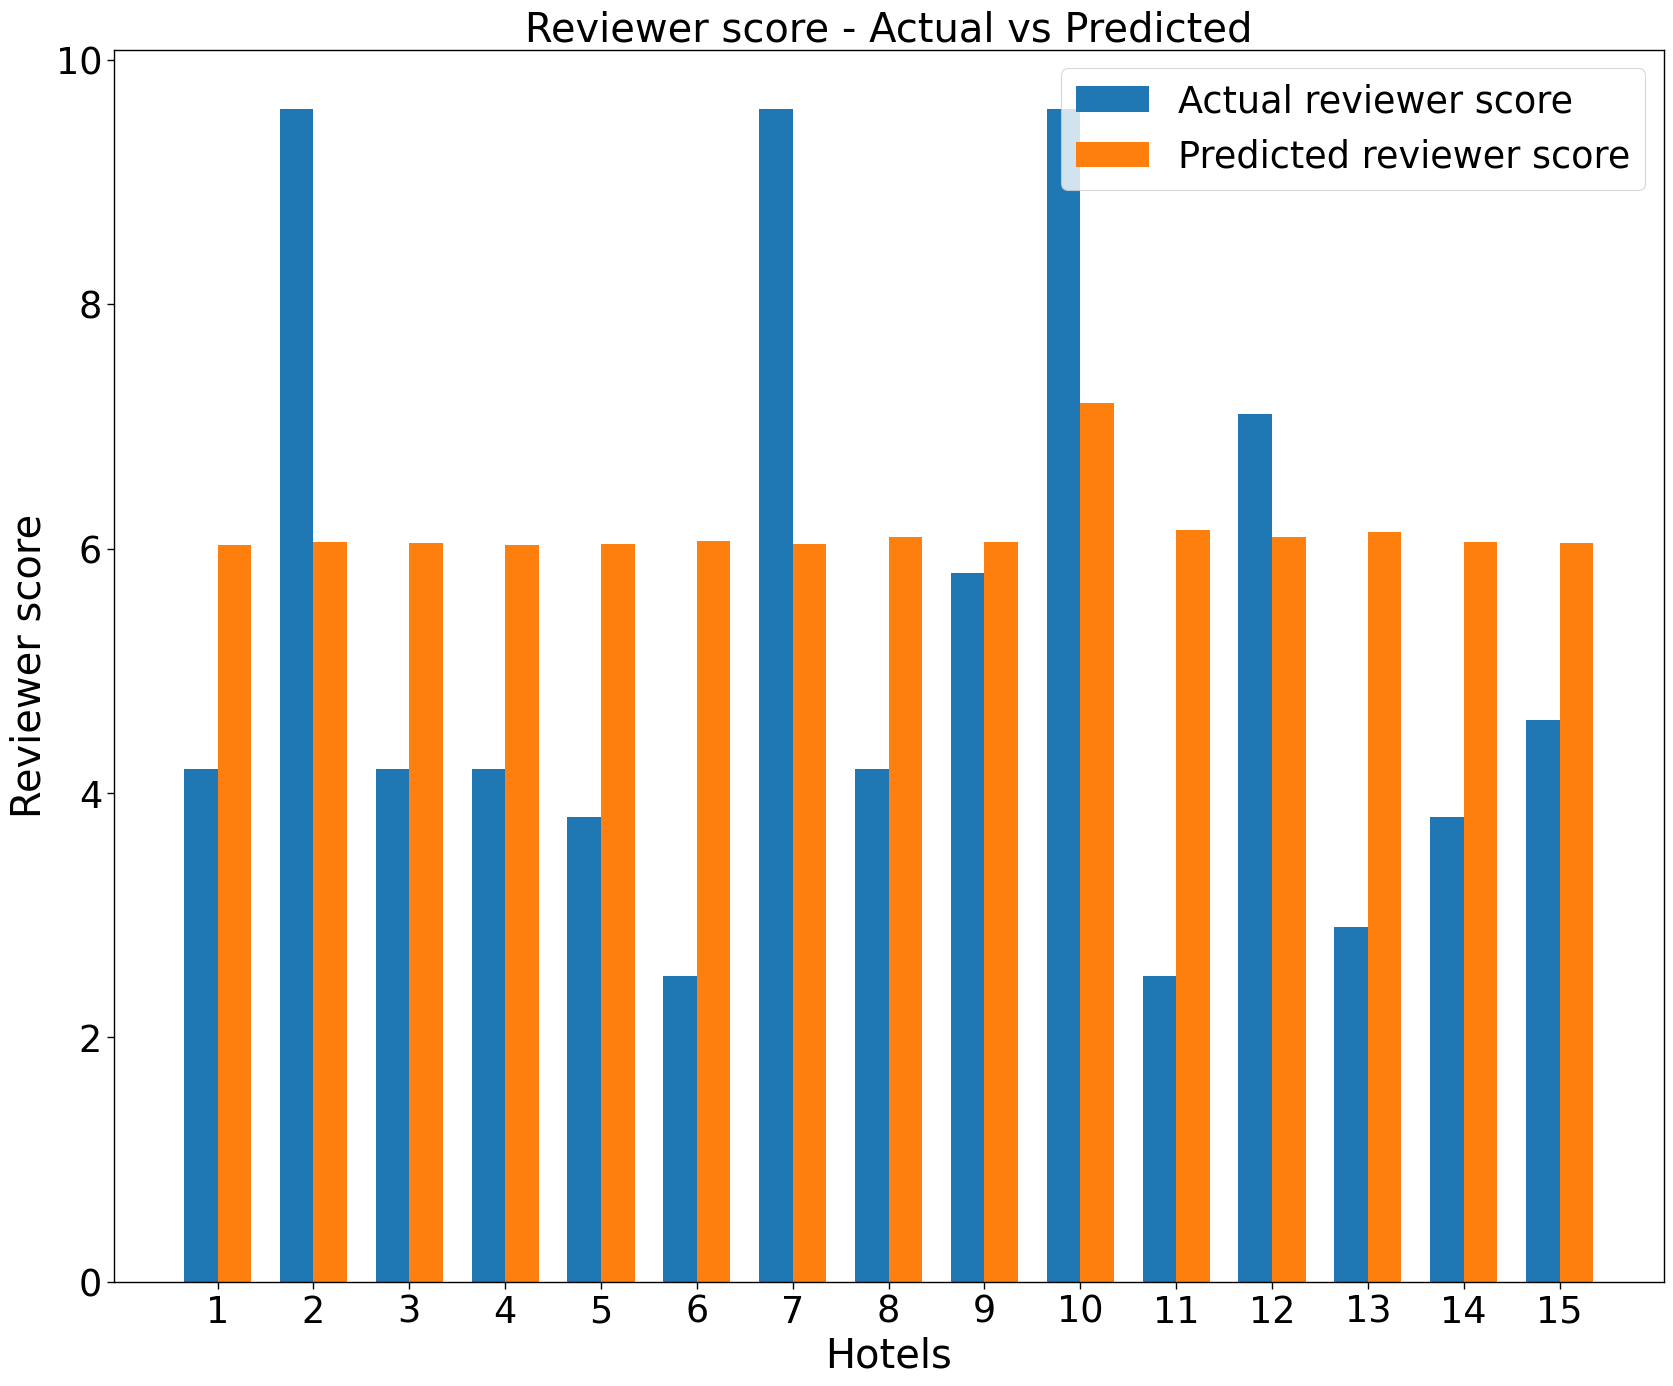

In [425]:
import matplotlib.pyplot as plt
ind = np.arange(15)
width = 0.35
plt.figure(figsize=(20, 16))
plt.bar(ind, y_test[:15], width, label='Actual reviewer score')
plt.bar(ind+width, y_pred[:15], width, label='Predicted reviewer score')

plt.xticks(ind+width/2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.legend(loc='best')

plt.xlabel("Hotels")
plt.ylabel("Reviewer score")
plt.title("Reviewer score - Actual vs Predicted")

plt.show()

In [426]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 2.18
Mean squared error = 5.62
Median absolute error = 2.08
Explain variance score = 0.06
R2 score = 0.05


C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\776077462.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(y_test[:2000],y_pred[:2000])


Text(0, 0.5, 'Predicted')

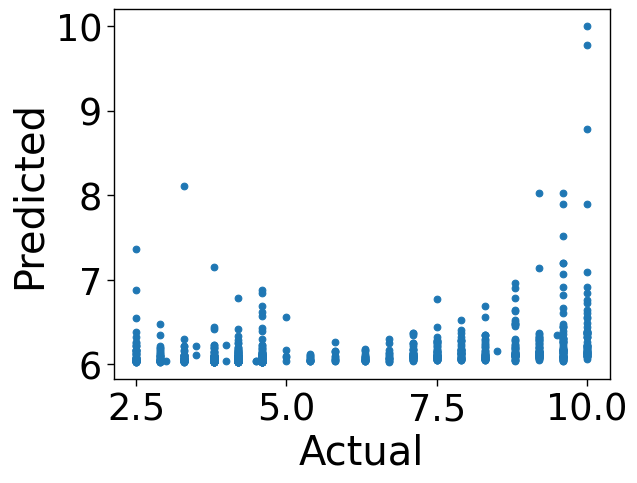

In [427]:
plt.scatter(y_test[:2000],y_pred[:2000])
plt.xlabel('Actual')
plt.ylabel('Predicted')

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\1808484886.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.regplot(x=y_test[:2000],y=y_pred[:2000],color ='red')


<AxesSubplot:xlabel='Reviewer_Score'>

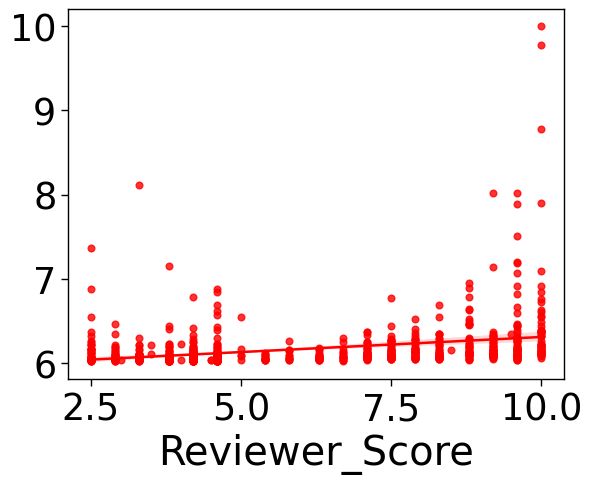

In [428]:
sns.regplot(x=y_test[:2000],y=y_pred[:2000],color ='red')

## Logistic regression

In [429]:
from sklearn.linear_model import LogisticRegression

In [430]:
df["is_bad_review"] = df['Reviewer_Score'].apply(lambda x: 1 if x < 5 else 0)

In [431]:
X=df['Reviewer_Score']
y=df[['is_bad_review']]

X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=10)


In [432]:
df.groupby(['is_bad_review']).size()

is_bad_review
0    1500
1    1500
dtype: int64

In [433]:
modelLogistic = LogisticRegression()
modelLogistic.fit(X_train,y_train)
print("The intercept b0= ", modelLogistic.intercept_)
print("The coefficient b1= ", modelLogistic.coef_)

The intercept b0=  [0.0383613]
The coefficient b1=  [[-3.08321964]]


c:\Users\dharaneish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [434]:
y_pred= modelLogistic.predict(X_test)

In [435]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[214 228]
 [ 75 383]]


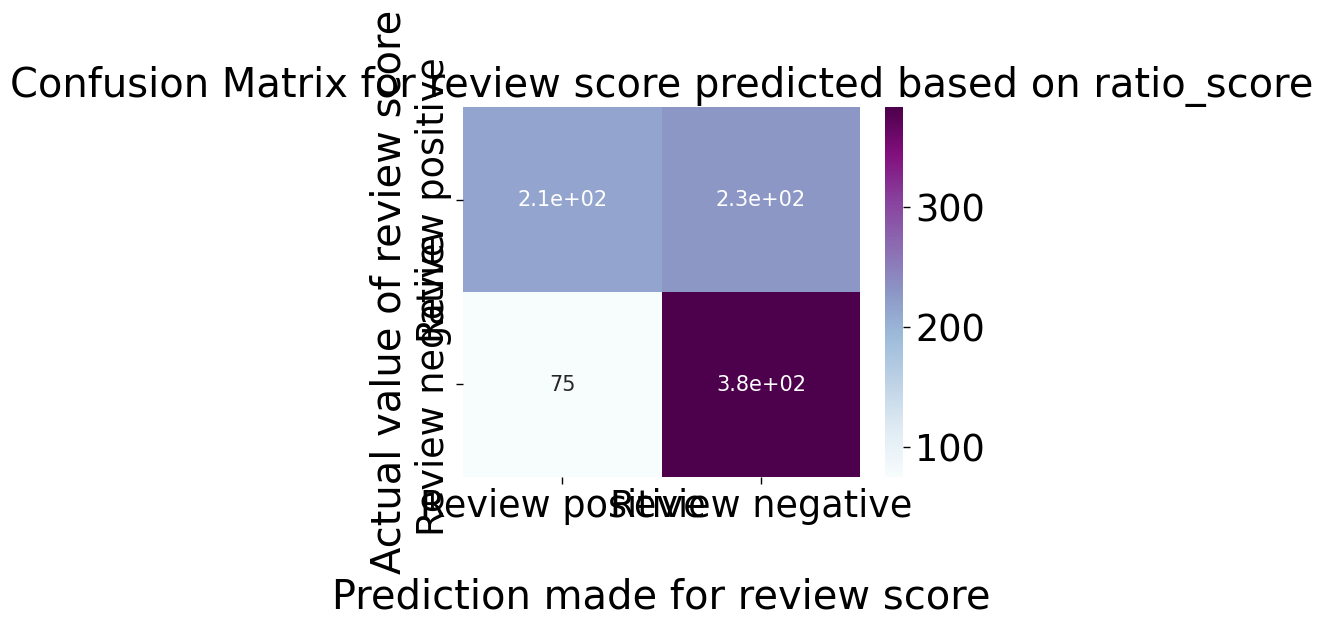

<Figure size 10000x10000 with 0 Axes>

In [436]:
ax = sns.heatmap(confusion_matrix, annot=True, cmap='BuPu')
ax.set_title('Confusion Matrix for review score predicted based on ratio_score')
ax.set_xlabel('\nPrediction made for review score')
ax.set_ylabel('Actual value of review score')
ax.xaxis.set_ticklabels(['Review positive','Review negative'])
ax.yaxis.set_ticklabels(['Review positive','Review negative'])
plt.figure(figsize=(100, 100))

plt.show()

In [437]:
#Accuracy from confusion matrix
TP= confusion_matrix[1,1] #True positive
TN= confusion_matrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.6633333333333333


In [438]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error,r2_score,f1_score,precision_score,recall_score,fbeta_score
cr = classification_report(y_test,y_pred)
print('Classification Report-->\n')
print(cr)

Classification Report-->

              precision    recall  f1-score   support

           0       0.74      0.48      0.59       442
           1       0.63      0.84      0.72       458

    accuracy                           0.66       900
   macro avg       0.68      0.66      0.65       900
weighted avg       0.68      0.66      0.65       900



## Using Language Analysis

In [439]:
import nltk
from nltk.corpus import stopwords
import nltk as nlp
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
text_list = []
nltk.download('omw-1.4')
for text in df.review:
    text = re.sub("[^a-zA-Z]", " ", str(text)) #remove numbers, special characters and punctuations
    text = nltk.word_tokenize(text) #tokenize text
    text = [word for word in text if not word in set(stopwords.words("english"))] #remove stopwords
    lemma = nlp.WordNetLemmatizer()
    text = [lemma.lemmatize(word) for word in text] #lemmaize text
    text = " ".join(text)
    text = text.replace('  ',' ')
    text_list.append(text)

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading omw-1.4: <urlopen error [WinE

In [440]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
rating_list=[]
for text in text_list:
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(text)['compound'] 
    rating_list.append(ss)

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>


In [441]:
df['ratings']=rating_list
df["review"] = text_list 
print(df.review.head())
print(df.ratings.head())

7807     I like charged room twice able get refund eith...
36197    The cleanseness room service poor u compare ov...
5446     The elevator working In two day I stopped insi...
25373    Service occasion patchy Excellent best arrival...
10684                      old stuff response request much
Name: review, dtype: object
7807    -0.4756
36197    0.5994
5446     0.7906
25373    0.9559
10684    0.0000
Name: ratings, dtype: float64


In [442]:
y = df['Reviewer_Score']
X = df[['ratings']]

In [443]:
#Split training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, test_size=0.3, random_state=10)

In [444]:
df.fillna(0, inplace=True)
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
df

,Unnamed: 0,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Ratio_count,is_bad_review,ratings
7807,64071,2682,2017-06-22,7.1,Britannia International Hotel Canary Wharf,United Kingdom,I did not like being charged for the same roo...,33,9086,Not a great deal,6,3,2.5,"[' Business trip ', ' Solo traveler ', ' Suite...",42,I like charged room twice able get refund eith...,0.181818,1,-0.4756
36197,492949,69,2015-09-22,8.7,Milan Suite Hotel,United Arab Emirates,The cleanseness and the room service was very...,28,933,The new extension of the hotel design wise,10,4,5.4,"[' Business trip ', ' Group ', ' Junior Suite ...",681,The cleanseness room service poor u compare ov...,0.357143,0,0.5994
5446,37387,34,2016-12-05,7.9,Le Dokhan s a Tribute Portfolio Hotel,Serbia,The elevator was not working In two days I wa...,29,222,One of the most beautiful hotel ever Unique m...,24,26,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",241,The elevator working In two day I stopped insi...,0.827586,0,0.7906
25373,320275,522,2017-04-27,8.8,St Pancras Renaissance Hotel London,United Kingdom,Service was on occasions patchy Excellent at ...,64,2058,Amazing lovingly restored historical building...,14,12,9.6,"[' Leisure trip ', ' Group ', ' Deluxe Room Ba...",98,Service occasion patchy Excellent best arrival...,0.218750,0,0.9559
10684,103078,297,2016-06-20,8.0,Saint James Albany Paris Hotel Spa,Kuwait,very old stuff didn t response my request,9,2868,not that much,4,28,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",409,old stuff response request much,0.444444,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19228,228291,531,2016-07-07,9.0,The Piccadilly London West End,Guernsey,noise from street at 4am rubbish and glass co...,24,2298,Welcome drink was very welcome Location is gr...,12,4,8.3,"[' Leisure trip ', ' Family with older childre...",392,noise street rubbish glass collection Dean Str...,0.500000,0,0.9231
15929,169554,438,2016-06-19,7.4,Hilton London Olympia,United Arab Emirates,old hotel and not worth the money,8,1786,friendlyness and helpful staff,5,3,4.6,"[' Business trip ', ' Solo traveler ', ' Singl...",410,old hotel worth money friendlyness helpful staff,0.625000,1,0.5719
32839,420438,493,2016-07-11,8.6,NH Collection Amsterdam Barbizon Palace,Denmark,Noise from the canal though that is NOT the h...,14,2865,Great breakfast Great room with Nice beds,8,1,9.2,"[' Leisure trip ', ' Family with young childre...",388,Noise canal though NOT hotel fault course Grea...,0.571429,0,0.9225
19973,242592,369,2016-07-05,6.4,Hotel Cavendish,United Kingdom,Booked a triple room with double bed Came wit...,44,2275,The location is great Central London on your ...,11,3,4.6,"[' Business trip ', ' Solo traveler ', ' Tripl...",394,Booked triple room double bed Came two single ...,0.250000,1,0.8689


In [445]:
#Linear regression - model training
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [446]:
y_pred = model.predict(X_test)

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\263832948.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(ind, y_test[:15], width, label='Actual reviewer score')


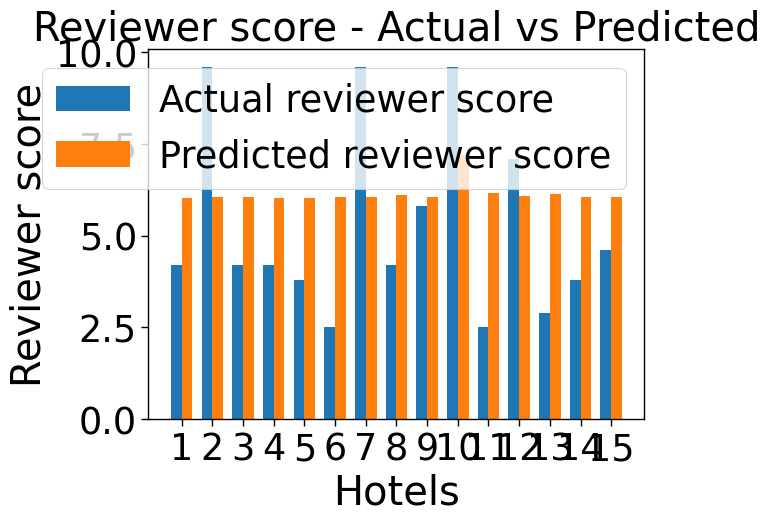

In [447]:
import matplotlib.pyplot as plt
ind = np.arange(15)
width = 0.35

plt.bar(ind, y_test[:15], width, label='Actual reviewer score')
plt.bar(ind+width, y_pred[:15], width, label='Predicted reviewer score')

plt.xticks(ind+width/2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.legend(loc='best')

plt.xlabel("Hotels")
plt.ylabel("Reviewer score")
plt.title("Reviewer score - Actual vs Predicted")

plt.show()

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\154023731.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.scatter(y_test[:1000],y_pred[:1000])


Text(0, 0.5, 'Predicted')

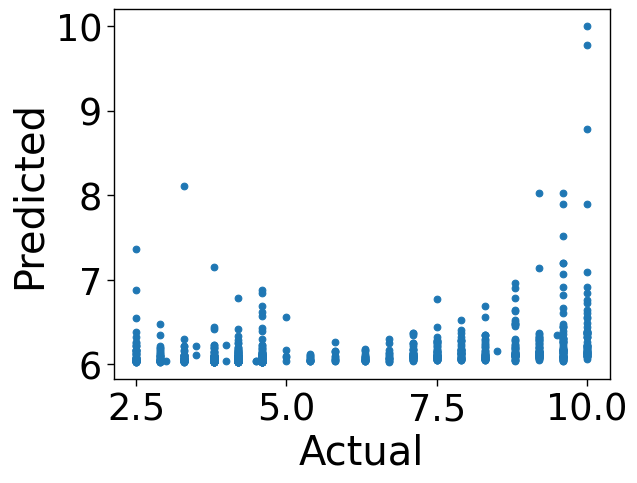

In [448]:
plt.scatter(y_test[:1000],y_pred[:1000])
plt.xlabel('Actual')
plt.ylabel('Predicted')

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\1808484886.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.regplot(x=y_test[:2000],y=y_pred[:2000],color ='red')


<AxesSubplot:xlabel='Reviewer_Score'>

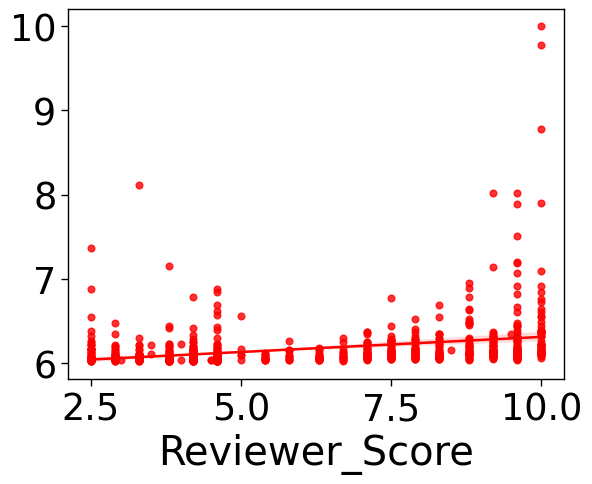

In [449]:
sns.regplot(x=y_test[:2000],y=y_pred[:2000],color ='red')

In [450]:
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score

print('Model Score: ',model.score(X,y))
print('Mean Squared Error: ',mean_squared_error(y_test.values, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test.values, y_pred))
print('R2 Score: ',r2_score(y_test.values, y_pred))


Model Score:  -3.994912529238852
Mean Squared Error:  5.621126859252868
Mean Absolute Error:  2.1805501843459303
R2 Score:  0.054678498566489875


c:\Users\dharaneish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ratings
Feature names seen at fit time, yet now missing:
- Ratio_count

  warnings.warn(message, FutureWarning)


## Random Forest

In [451]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [452]:
y=df['Reviewer_Score']
X=df['Ratio_count']
X_train, X_test, y_train, y_test = train_test_split(df.select_dtypes(include='number'), y, test_size=0.3, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(df.select_dtypes(include='number'), y, test_size=0.2, random_state=10)

In [453]:
model_1 = LinearRegression()
model_2 = xgb.XGBRegressor()
model_3 = RandomForestRegressor()
 

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)
 

pred_1 = model_1.predict(X_test)
pred_2 = model_2.predict(X_test)
pred_3 = model_3.predict(X_test)
 
pred_final = (pred_1+pred_2+pred_3)/3.0

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\1302255607.py:5: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(ind, y_test[:15], width, label='Actual reviewer score')


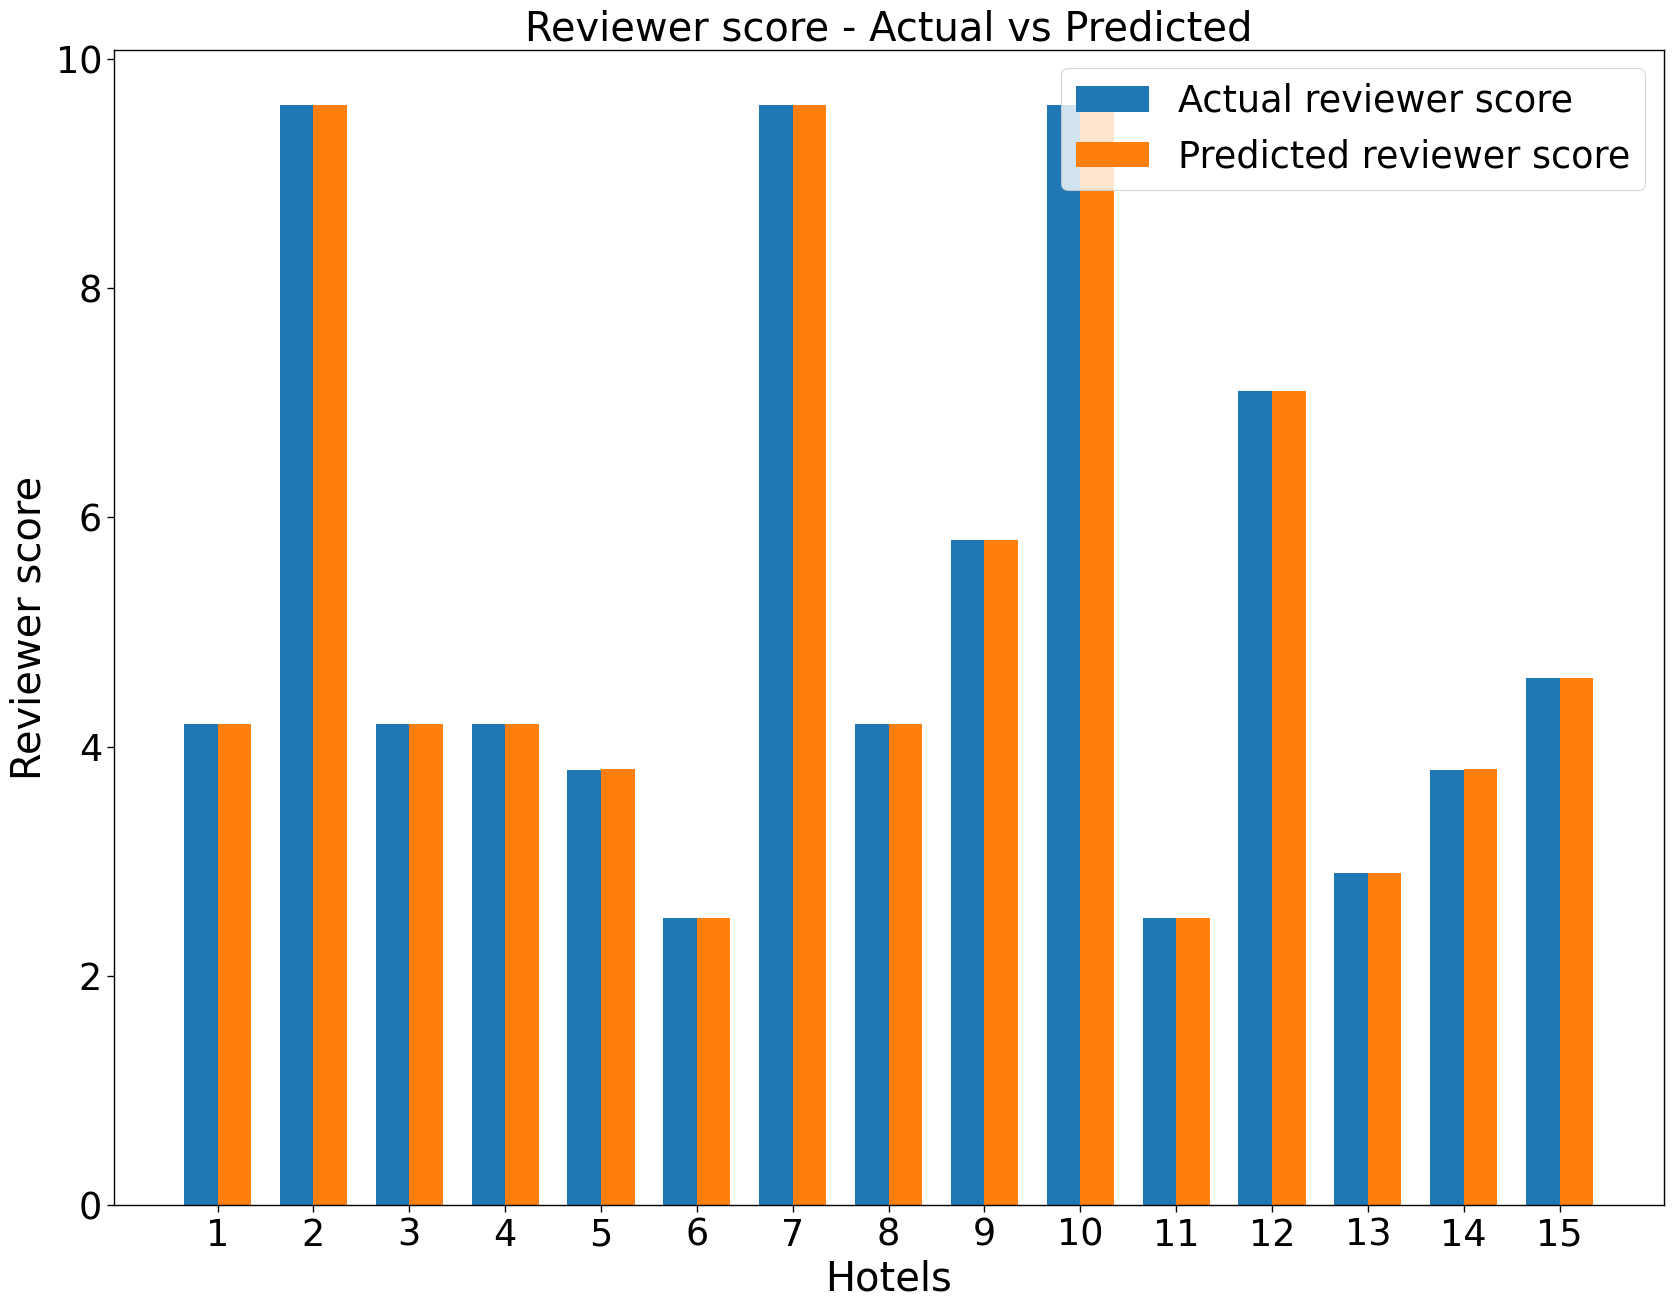

In [454]:
import matplotlib.pyplot as plt
ind = np.arange(15)
width = 0.35
plt.figure(figsize=(20, 15))
plt.bar(ind, y_test[:15], width, label='Actual reviewer score')
plt.bar(ind+width, pred_final[:15], width, label='Predicted reviewer score')

plt.xticks(ind+width/2, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
plt.legend(loc='best')

plt.xlabel("Hotels")
plt.ylabel("Reviewer score")
plt.title("Reviewer score - Actual vs Predicted")

plt.show()

In [455]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, pred_final), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, pred_final), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, pred_final), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, pred_final), 2)) 
print("R2 score =", round(sm.r2_score(y_test, pred_final), 2))

Mean absolute error = 0.0
Mean squared error = 0.0
Median absolute error = 0.0
Explain variance score = 1.0
R2 score = 1.0


## Decision Trees

In [456]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, load_breast_cancer
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesRegressor

import graphviz

In [457]:
df2 = df[['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score']]

In [458]:
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1],df2.iloc[:,-1],test_size=0.3,random_state=0)

In [459]:
reg= ExtraTreesRegressor()

In [460]:
reg.fit(X_train,y_train)

ExtraTreesRegressor()

In [461]:
reg.feature_importances_

array([0.09848319, 0.22841089, 0.23579879, 0.09782812, 0.23500391,
       0.1044751 ])

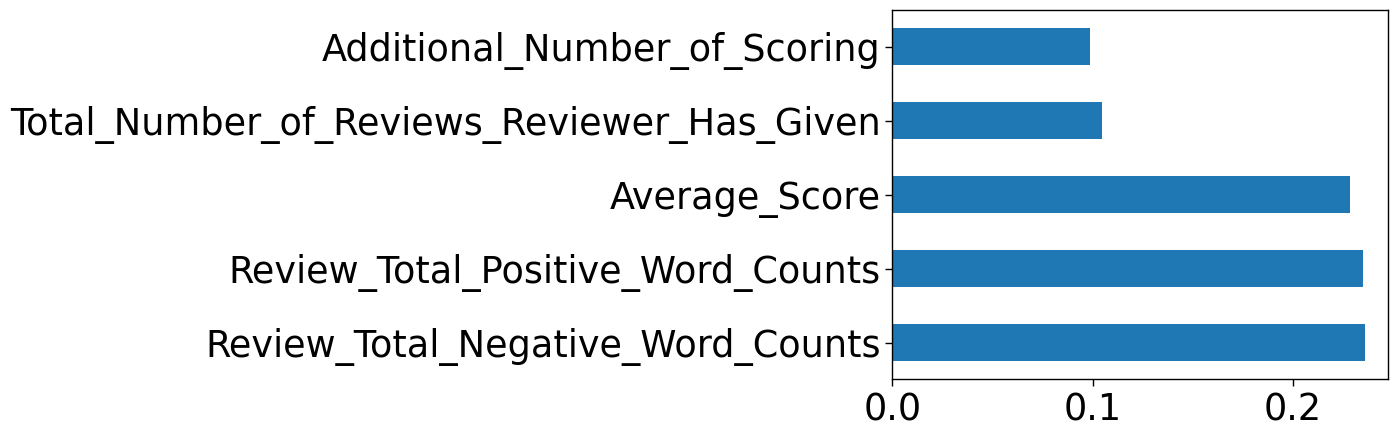

In [462]:
feat_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [463]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']]

<AxesSubplot:>

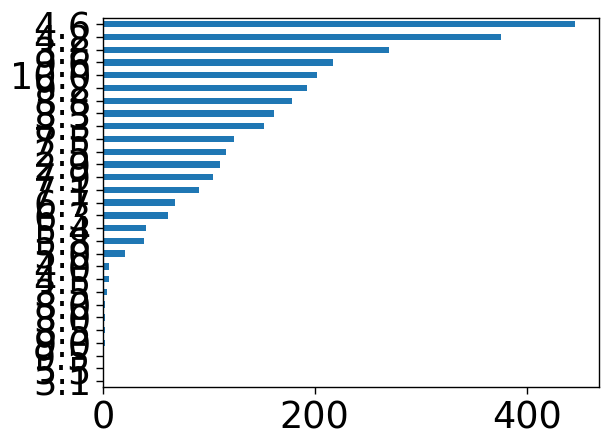

In [464]:
df2['Reviewer_Score'].value_counts().sort_values().plot(kind = 'barh')

In [465]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.3, random_state=0)

In [466]:
y_test  = round(y_test).astype(int)
y_train = round(y_train).astype(int)

In [467]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

y_pred = reg_decision_model.predict(X_test)

In [468]:
# without hyperparameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 2.0153703703703707
MSE: 7.648734567901235
RMSE: 2.765634568756551


In [469]:
text_representation = export_text(reg_decision_model)
print(text_representation)

|--- feature_0 <= 8.35
|   |--- feature_2 <= 14.50
|   |   |--- feature_1 <= 46.50
|   |   |   |--- feature_2 <= 6.50
|   |   |   |   |--- feature_1 <= 12.50
|   |   |   |   |   |--- feature_2 <= 4.50
|   |   |   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |   |   |--- value: [2.00]
|   |   |   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |   |   |--- feature_1 <= 6.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 4.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 7.90
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 7.65
|   |   |   |   |   |   |   |   |   |   |   |--- value: [5.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  7.65
|   |   |   |   |   |   |   |   |   |   |   |--- value: [8.00]
|   |   |   |   |   |   |   |   |   |--- feature_0 >  7.90
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 8.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |-

[Text(0.5878556092924972, 0.9814814814814815, 'Average_Score <= 8.35\nsquared_error = 6.383\nsamples = 2100\nvalue = 6.19'),
 Text(0.3385663162324506, 0.9444444444444444, 'Review_Total_Positive_Word_Counts <= 14.5\nsquared_error = 5.144\nsamples = 1126\nvalue = 5.374'),
 Text(0.20435918377266588, 0.9074074074074074, 'Review_Total_Negative_Word_Counts <= 46.5\nsquared_error = 3.937\nsamples = 712\nvalue = 4.916'),
 Text(0.09119912969178502, 0.8703703703703703, 'Review_Total_Positive_Word_Counts <= 6.5\nsquared_error = 4.762\nsamples = 469\nvalue = 5.294'),
 Text(0.03504640620523106, 0.8333333333333334, 'Review_Total_Negative_Word_Counts <= 12.5\nsquared_error = 3.486\nsamples = 196\nvalue = 4.765'),
 Text(0.017705476648520322, 0.7962962962962963, 'Review_Total_Positive_Word_Counts <= 4.5\nsquared_error = 4.894\nsamples = 74\nvalue = 5.257'),
 Text(0.00810445745159838, 0.7592592592592593, 'Review_Total_Negative_Word_Counts <= 2.5\nsquared_error = 2.688\nsamples = 32\nvalue = 4.5'),
 Text

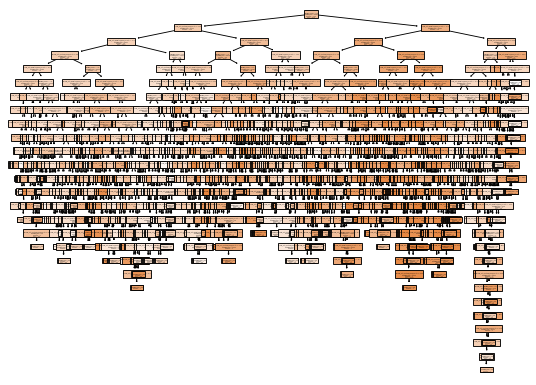

In [470]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plot_tree(reg_decision_model, filled=True, 
            feature_names = ['Average_Score',
       'Review_Total_Negative_Word_Counts',
       'Review_Total_Positive_Word_Counts'],
            class_names = ['2','3','4','5','6','7','8','9','10'])

## Support Vector Machine

In [471]:
#df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']][:1000]
df2 = df[['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']][:1000]

In [472]:
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 5 else 0)

In [473]:
df2.shape[0]

1000

In [474]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [475]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [476]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

c:\Users\dharaneish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


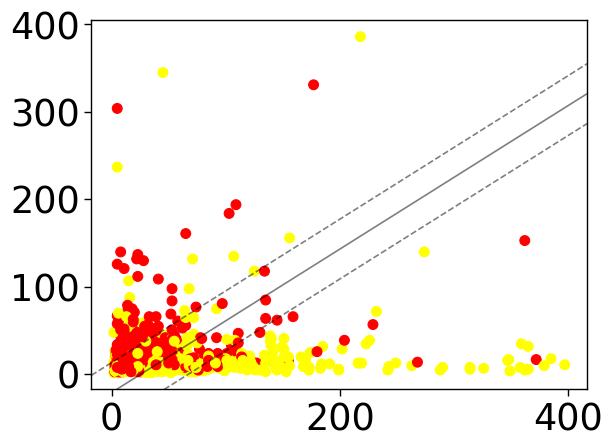

In [477]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1] , c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

## KNN Regression

In [478]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

In [479]:
df2 = df[['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']].sample(2500)

In [480]:
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']

In [481]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [482]:
knn = KNeighborsRegressor(n_neighbors=25)  
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=25)

In [483]:
pred=knn.predict(X_test) #make prediction on test set

print('RMSE value = ' , 'is:', mean_squared_error(y_test,pred))
print('RMSE value = ' , 'is:', np.sqrt(mean_squared_error(y_test,pred)))
print('MAE value = ' , 'is:', (mean_absolute_error(y_test,pred)))

RMSE value =  is: 4.382835104
RMSE value =  is: 2.0935221766200613
MAE value =  is: 1.711768


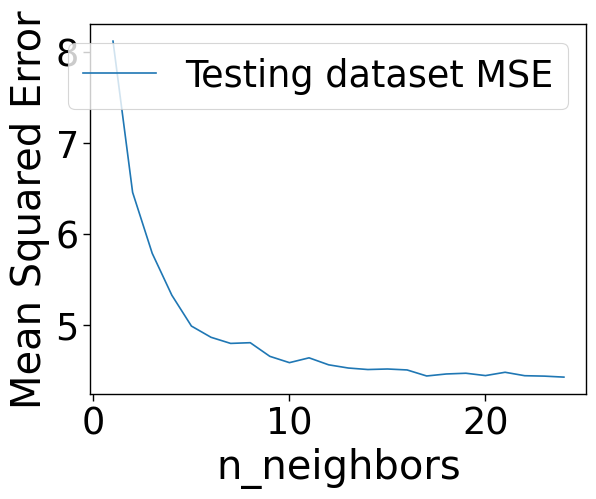

In [484]:
neighbors = np.arange(1, 25)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred=knn.predict(X_test)
      
    # Compute training and test data accuracy
    test_accuracy[i] = mean_squared_error(pred, y_test)
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset MSE')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Mean Squared Error')
plt.show()

## K- Means Clustering

In [485]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [486]:
df2 = df[['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']][0:2000]

In [487]:
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else 0)

In [488]:
'''
y = round(y).astype(int)
y.value_counts()
'''

'\ny = round(y).astype(int)\ny.value_counts()\n'

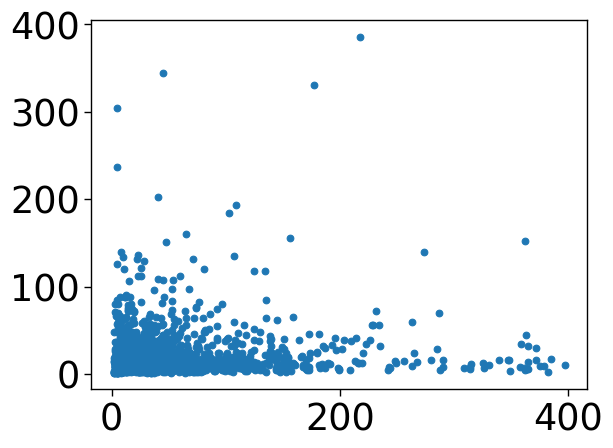

In [489]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])

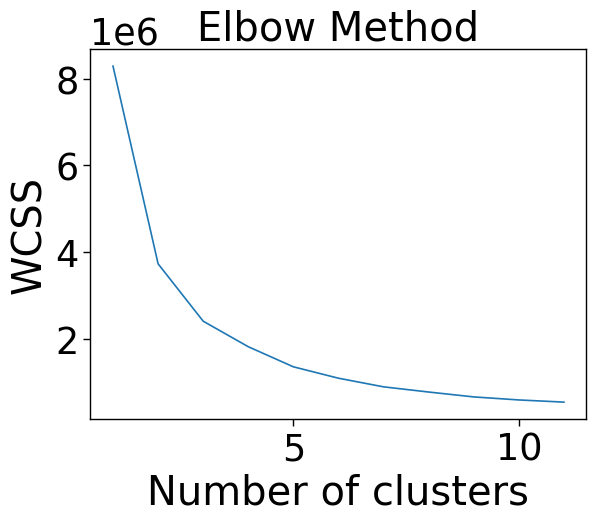

In [490]:
wcss = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

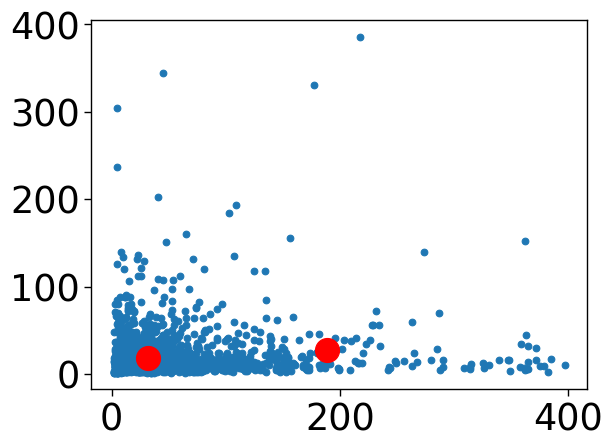

In [491]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [492]:
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(pred_y, y)
print("Entropy based Decision Tree classifier achieves {}% accuracy on the car evaluation dataset".format(acc * 100))
print("Confusion Matrix \n",confusion_matrix(y, pred_y))

Entropy based Decision Tree classifier achieves 50.8% accuracy on the car evaluation dataset
Confusion Matrix 
 [[829  18]
 [966 187]]


## Perceptron MLP

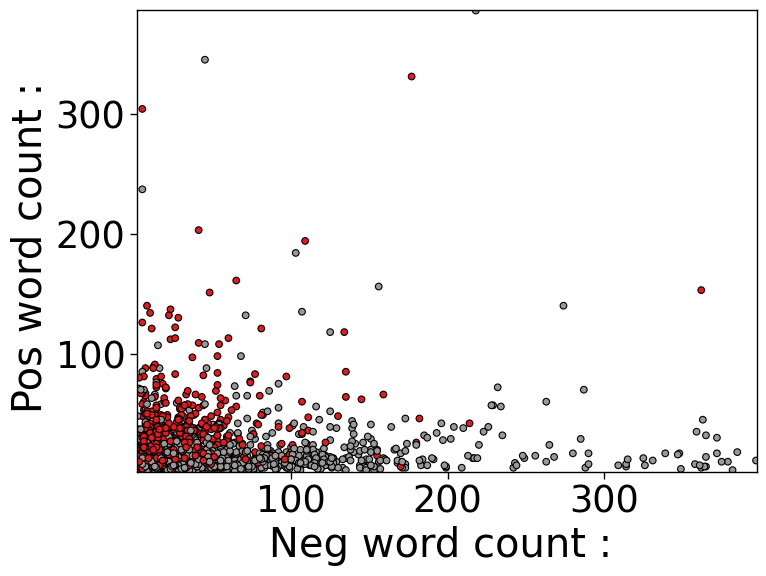

In [493]:
df2 = df[['Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']][0:2000]
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else -1)

#y[np.where(y == 0)] = -1

x_min, x_max = X.iloc[:, 0].min() - .5, X.iloc[:, 0].max() + .5
y_min, y_max = X.iloc[:, 1].min() - .5, X.iloc[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Neg word count : ')
plt.ylabel('Pos word count : ')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [494]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from tqdm import *
from collections import OrderedDict
import pdb


# Plot decision boundary
def plot_line(X, y, w, b):
    pos = X[np.where(y==1)]
    neg = X[np.where(y==-1)]
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.set_xlim([x_min, x_max])
    ax.set_ylim([y_min, y_max])
    ax.scatter(*zip(*pos), color='b')
    ax.scatter(*zip(*neg), color='r')
    xmin, xmax = plt.xlim() 
    xx = np.linspace(xmin, xmax)
    a = -w[0] / w[1]
    yy = a * xx + b
    ax.plot(xx, yy, 'k-')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.show()

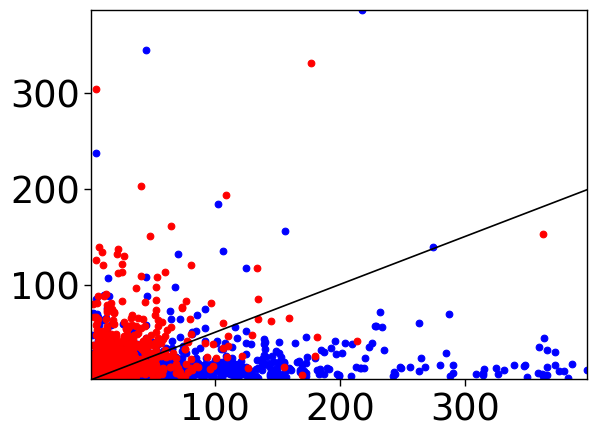

In [495]:
w = [-10, 20]
b = 0.5
plot_line(X.to_numpy(), y.to_numpy(), w, b)

## Dimentionality Reduction

### PCA

In [496]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [497]:
df.columns

Index(['Unnamed: 0', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'review', 'Ratio_count', 'is_bad_review',
       'ratings'],
      dtype='object')

In [498]:
df2 = df[['Additional_Number_of_Scoring', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'days_since_review' ]]

In [499]:
label_encoder = preprocessing.LabelEncoder()
df2['Reviewer_Nationality'] = label_encoder.fit_transform(df2["Reviewer_Nationality"])
df2['Reviewer_Nationality'].unique()

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\2009140678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Reviewer_Nationality'] = label_encoder.fit_transform(df2["Reviewer_Nationality"])


array([108, 107,  89,  58, 106,   8,  50, 109,  36,  39, 104,   5,  94,
        84,  82,  86,  88,  66,  34,  61,  98,  48,  87,  45,  25,  73,
        38,  44,  12,  23,  42,  26,   2,  51,  63, 101,  20,  76,  71,
        28,  31,  83,  19,  52,  27,  85,   9,   1,  92,  97,  78,  90,
        41,   4,  67,  95,  93,  57,  11,  15,  54,  77,  43,   7, 105,
        75, 111,  91,  74,  81,  60,  33,  46,  65,  55,  18, 110,  24,
       103,  53,  99,   6,  64,  62,  22,  49,  13,  59,   0,  56,  80,
         3,  32,  68,  35,  72,  40,  16,  47, 100,  21,  10,  30,  96,
        29,  17,  70, 102,  79,  37,  14,  69])

In [500]:
label_encoder = preprocessing.LabelEncoder()
df2['Hotel_Name'] = label_encoder.fit_transform(df2["Hotel_Name"])
df2['Hotel_Name'].unique()

C:\Users\dharaneish\AppData\Local\Temp\ipykernel_14704\2136297380.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Hotel_Name'] = label_encoder.fit_transform(df2["Hotel_Name"])


array([103, 544, 473, 708, 676, 611, 762, 632, 754, 126,  52, 309, 808,
        73,  80, 388, 273, 291, 758, 539, 352,   3, 412, 308, 197, 550,
       348, 659, 304, 554, 507, 532, 622, 467, 714, 713, 641, 195, 637,
       430, 284, 167, 521, 277, 169, 643, 280, 469, 323, 446, 150, 533,
       119, 133, 601, 595, 184, 575, 746, 312,  14, 769, 513, 670, 649,
       319, 461, 345, 142, 320, 793, 481, 310,  83, 493, 767,  49, 406,
       249,  74, 788,  81, 581, 778, 443, 530, 531, 393, 750, 528, 325,
       815, 254, 811, 587, 415, 285, 561, 588, 789, 684,  97, 141, 288,
        23, 441,  28, 187, 267, 580, 344, 416, 586, 160, 395, 524, 210,
         0, 258, 820, 804, 816, 744, 515, 779,  94, 408,  24,  78, 765,
       558, 425, 113, 400, 646, 698, 721, 783, 578,  60, 306, 736, 401,
       299, 242, 329, 806, 759,  95, 282, 154, 121, 631, 584, 283,  64,
       131,  39,  55, 711, 501, 630, 343, 822, 456, 337, 666, 817, 494,
       619, 523, 220, 781, 568, 264, 773, 671, 411, 651, 591, 65

In [501]:
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else 0)

In [502]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [503]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [504]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_


In [505]:
X_test.shape

(600, 2)

Text(0, 0.5, 'Second Principal Component')

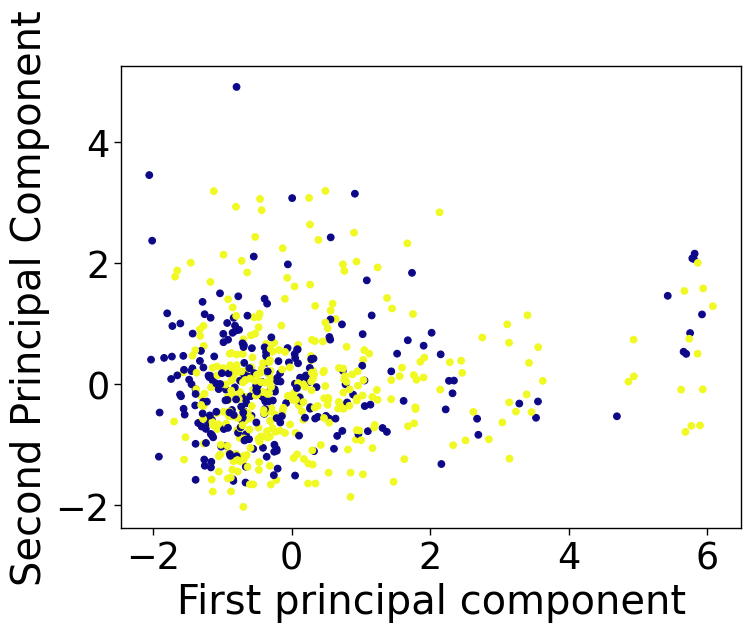

In [506]:
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [507]:
pca.components_

array([[ 0.6693099 , -0.2621069 , -0.05254686,  0.06796354,  0.05969151,
         0.67472617, -0.07067084, -0.1059625 , -0.03005182],
       [ 0.04774714,  0.16269516, -0.01113765, -0.0537631 ,  0.50617766,
         0.04104103,  0.6205181 ,  0.15822562, -0.54795778]])

<AxesSubplot:>

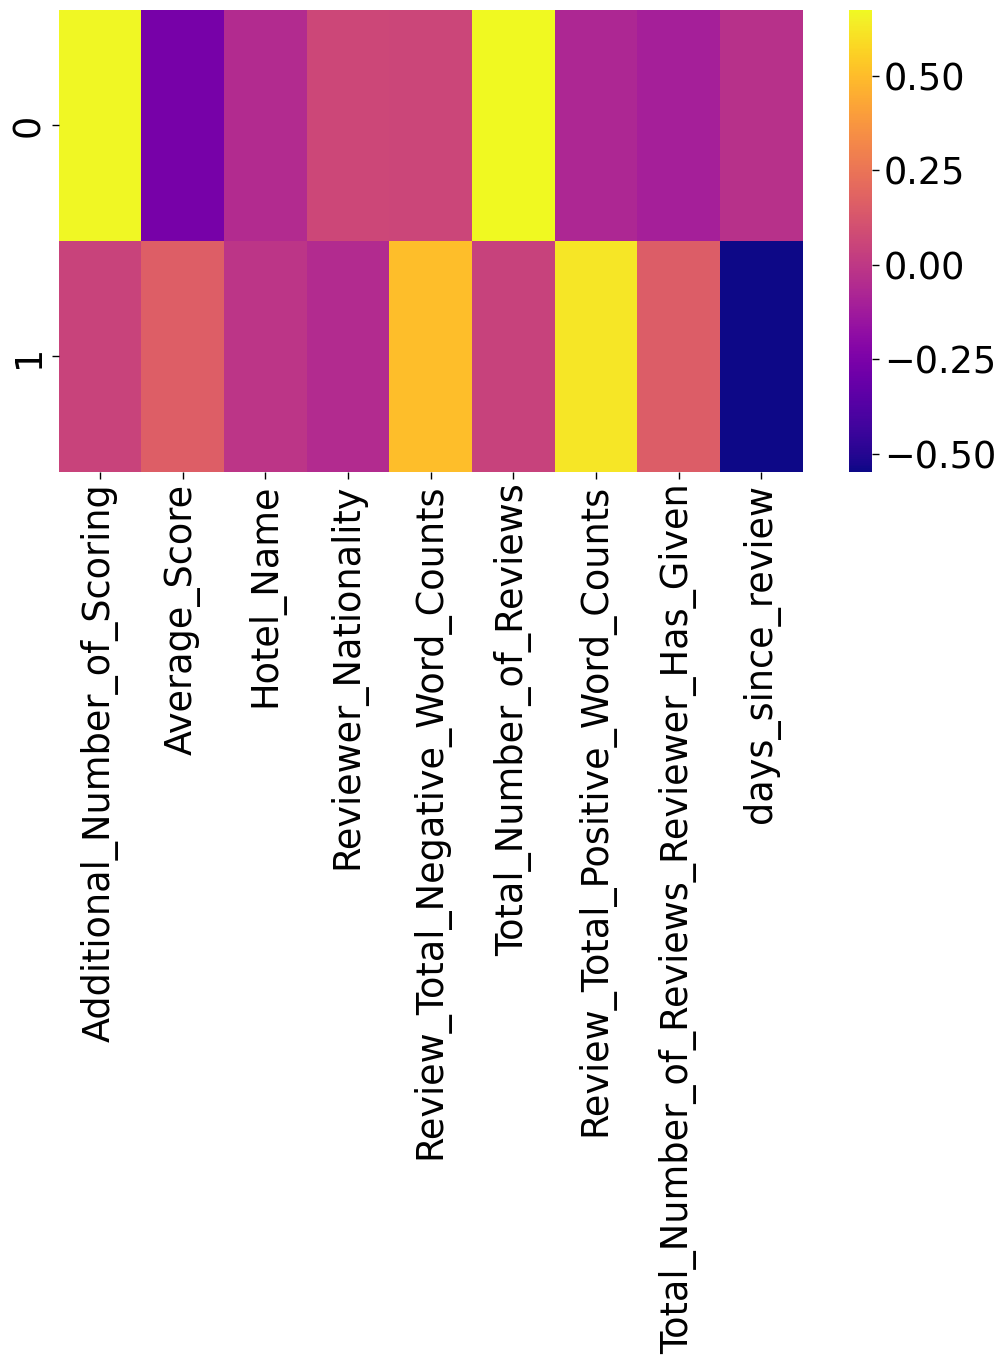

In [508]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [509]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [510]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 67 185]
 [ 37 311]]


In [511]:
#Accuracy from confusion matrix
TP= confusion_matrix[1,1] #True positive
TN= confusion_matrix[0,0] #True negative
Total=len(y_test)
print("Accuracy from confusion matrix is ", (TN+TP)/Total)

Accuracy from confusion matrix is  0.63


### SVD

In [512]:
# evaluate svd with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

df2 = df[['Additional_Number_of_Scoring','Average_Score', 'Review_Total_Negative_Word_Counts','Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score' ]]
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else 0)

# define the pipeline
steps = [('svd', TruncatedSVD(n_components=4)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.720 (0.015)


>1 0.577 (0.001)
>2 0.577 (0.001)
>3 0.646 (0.019)
>4 0.720 (0.015)
>5 0.720 (0.012)


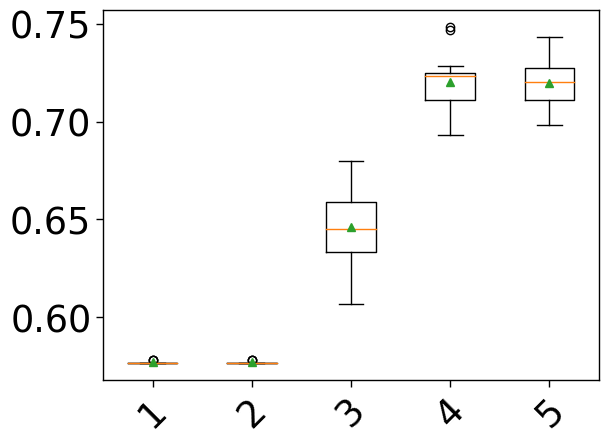

In [513]:
# compare svd number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

df2 = df[['Additional_Number_of_Scoring','Average_Score', 'Review_Total_Negative_Word_Counts','Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score' ]]
X = df2.drop(['Reviewer_Score'], axis=1)
y = df2['Reviewer_Score']
y = y.apply(lambda x: 1 if x < 7 else 0)

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,6):
		steps = [('svd', TruncatedSVD(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

## Hyper Parameter Tuning

### Logistic regression

In [514]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.preprocessing import MinMaxScaler

In [515]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts','Reviewer_Score','is_bad_review']]

In [516]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = MinMaxScaler() #saga solver requires features to be scaled for model conversion

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [518]:
clf = [
    LogisticRegression(solver='newton-cg',penalty='l2',max_iter=1000),
    LogisticRegression(solver='lbfgs',penalty='l2',max_iter=1000),
    LogisticRegression(solver='sag',penalty='l2',max_iter=1000),
    LogisticRegression(solver='saga',penalty='l2',max_iter=1000)
    ]
clf_columns = []
clf_compare = pd.DataFrame(columns = clf_columns)

row_index = 0
for alg in clf:
        
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    clf_name = alg.__class__.__name__
    clf_compare.loc[row_index, 'Train Accuracy'] = round(alg.score(X_train, y_train), 5)
    clf_compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 5)
    clf_compare.loc[row_index, 'Precission'] = round(precision_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'Recall'] = round(recall_score(y_test, predicted),5)
    clf_compare.loc[row_index, 'AUC'] = round(auc(fp, tp),5)

    row_index+=1
    
clf_compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)
clf_compare

,Train Accuracy,Test Accuracy,Precission,Recall,AUC
0,0.98,0.97467,0.95178,1.0,0.97467
1,0.98,0.97467,0.95178,1.0,0.97467
2,0.98,0.97467,0.95178,1.0,0.97467
3,0.98,0.97467,0.95178,1.0,0.97467


### KNN

In [519]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV

In [520]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']]

In [539]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [540]:
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform')

KNeighborsRegressor()

In [541]:
model = KNeighborsRegressor(n_neighbors=18)

In [542]:
# Select an algorithm
algorithm = KNeighborsRegressor()

In [543]:
# Create 3 folds
seed = 13
kfold = KFold(n_splits=6, shuffle=True, random_state=seed)

In [544]:
# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

In [545]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

GridSearchCV(cv=KFold(n_splits=6, random_state=13, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [546]:
grid.score(X_test[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts']],y_test)

0.4324509058671805

In [547]:
# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.23715078068220471
KNeighborsRegressor(n_neighbors=6)
{'n_neighbors': 6, 'weights': 'uniform'}


### Decision Tree

In [548]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [549]:
from sklearn.tree import DecisionTreeRegressor

In [550]:
df2 = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts', 'Reviewer_Score']]

In [551]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.3 ,random_state=0)

In [552]:
y_test  = round(y_test).astype(int)
y_train = round(y_train).astype(int)

In [553]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model=DecisionTreeRegressor()
# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [554]:
prediction=reg_decision_model.predict(X_test)

In [555]:
# Hyper parameters range intialization for tuning 
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [556]:
# calculating different regression metrics
from sklearn.model_selection import GridSearchCV

In [557]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [558]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [559]:
X=df2.iloc[:,:-1]
y=df2.iloc[:,-1]

In [560]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,y)

timer(start_time)

In [561]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 11,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [562]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',
                                         max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best')

In [563]:
# fitting model
tuned_hyper_model.fit(X_train,y_train)

c:\Users\dharaneish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=5, max_features='auto',
                      min_weight_fraction_leaf=0.1)

In [564]:
# prediction 
tuned_pred=tuned_hyper_model.predict(X_test)

In [565]:
# without hyperparameter tuning 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 2.0477777777777777
MSE: 7.959814814814815
RMSE: 2.821314377167992


In [566]:
# With hyperparameter tuned 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,tuned_pred)))

MAE: 1.8041211326956939
MSE: 4.792079299824353
RMSE: 2.189081839453325
